In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import math
from astropy.constants import c 
from astropy.io import fits
from skimage.transform import resize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import _pickle as cPickle

from scipy.optimize import curve_fit
from scipy.integrate import quad

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 100
font = {'size'   : 25}

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rc_file_defaults()
plt.rc('font', **font)
mpl.rcParams['image.origin'] = 'lower'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# mpl.rc('text', usetex=True)
# plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
#mpl.rcParams['text.latex.preamble'] = [r'\boldmath']


mpl.rc('font', **font)

sol_radius = 6.95700e8

In [2]:
def create_extra_snaps(res, std_err = False):
    shape = res.shape
    disc_centre_avg = res[0,:].mean()
    if not std_err:
        disc_centre_std = res[0,:].std()
    elif std_err:
        disc_centre_std = res[0,:].std()/np.sqrt(shape[1])
    off_centre = np.zeros((12,int(shape[1]*2)))
    off_centre[:,:shape[1]] = res[1:13,:]
    off_centre[:,shape[1]:] = res[13:,:]
    total_avg = [disc_centre_avg] + off_centre.mean(-1).tolist()
    if not std_err:
        total_std = [disc_centre_std] + off_centre.std(-1).tolist()
    elif std_err:
        total_std = [disc_centre_std] + (off_centre.std(-1)/np.sqrt(shape[1]*2)).tolist()
    return total_avg, total_std

In [3]:
def get_corr_avg_std_of_pos_neg(res_200,res_120,res_100,res_50,res_30, std_err = False):
    avg_200, std_200 = create_extra_snaps(res_200, std_err)
    avg_120, std_120 = create_extra_snaps(res_120, std_err)
    avg_100, std_100 = create_extra_snaps(res_100, std_err)
    avg_50, std_50 = create_extra_snaps(res_50, std_err)
    avg_30, std_30 = create_extra_snaps(res_30, std_err)
    return [avg_200,std_200], [avg_120,std_120], [avg_100,std_100], [avg_50, std_50], [avg_30,std_50]

# 6173

In [51]:
#load one pixel results
with open(r"./blos_pickles/cmilos_200_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_120_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_100_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_50_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_30_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_30 = cPickle.load(output_file)

In [9]:
res_one_200[4,:]

array([80.65094729, 78.99635125, 81.49131365, 85.193332  , 77.34157056,
       82.75559211, 80.39872721, 77.46299608, 74.344804  , 76.92336639,
       80.12603729, 81.78043633, 80.83220446, 76.9287889 ])

In [10]:
res_one_200[16,:]

array([83.725756  , 75.29403451, 78.2500143 , 82.764825  , 79.66704398,
       82.96330802, 80.646543  , 76.61565617, 73.295214  , 80.94873677,
       81.36839858, 77.78130066, 76.15582191, 71.3050328 ])

In [52]:
plot_one_200,plot_one_120,plot_one_100,plot_one_50,plot_one_30 = get_corr_avg_std_of_pos_neg(res_one_200,res_one_120,res_one_100,res_one_50,res_one_30,std_err = False)

In [53]:
#load hmi results
with open(r"./blos_pickles/cmilos_200_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_120_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_100_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_50_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_30_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_30 = cPickle.load(output_file)
    
#res_hmi_200a,res_hmi_120a,res_hmi_100a,res_hmi_50a,res_hmi_30a = avg_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30)

In [54]:
plot_hmi_200,plot_hmi_120,plot_hmi_100,plot_hmi_50,plot_hmi_30 = get_corr_avg_std_of_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30,std_err = False)

In [55]:
#load fdt results
with open(r"./blos_pickles/cmilos_200_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_120_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_100_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_50_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_30_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_30 = cPickle.load(output_file)
    
#res_fdt_200a,res_fdt_120a,res_fdt_100a,res_fdt_50a,res_fdt_30a = avg_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30)

In [56]:
plot_fdt_200,plot_fdt_120,plot_fdt_100,plot_fdt_50,plot_fdt_30 = get_corr_avg_std_of_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30,std_err = False)

In [57]:
#load hrt results
with open(r"./blos_pickles/cmilos_200_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_120_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_100_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_50_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_30_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_30 = cPickle.load(output_file)
    
#res_hrt_200a,res_hrt_120a,res_hrt_100a,res_hrt_50a,res_hrt_30a = avg_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30)

In [58]:
plot_hrt_200,plot_hrt_120,plot_hrt_100,plot_hrt_50,plot_hrt_30 = get_corr_avg_std_of_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30,std_err = False)

In [59]:
#load MURaM results
with open(r"./blos_pickles/cmilos_200_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_120_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_100_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_50_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_30_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_30 = cPickle.load(output_file)

In [60]:
plot_MURaM_200,plot_MURaM_120,plot_MURaM_100,plot_MURaM_50,plot_MURaM_30 = get_corr_avg_std_of_pos_neg(res_MURaM_200,res_MURaM_120,res_MURaM_100,res_MURaM_50,res_MURaM_30,std_err = False)

In [14]:
plot_MURaM_30

[[31.188577559195288,
  23.756376784078093,
  18.618132811603786,
  14.949235526736413,
  11.903084875952874,
  9.297971293756877,
  7.024355042159735,
  5.027669551640561,
  4.11853442956328,
  3.200056544378299,
  2.130027970307512,
  1.1345287967902808,
  0.2742657366411369],
 [0.9577421693489362,
  1.0598805943635947,
  1.3566772496560673,
  1.5328099943648132,
  1.6217919735031507,
  1.6291202781768799,
  1.5494511125740393,
  1.4991807444383871,
  1.507775909999009,
  1.5367279363972521,
  1.669351761637912,
  1.9464874606200988,
  2.5629853552106416]]

In [15]:
plot_MURaM_30

[[31.188577559195288,
  23.756376784078093,
  18.618132811603786,
  14.949235526736413,
  11.903084875952874,
  9.297971293756877,
  7.024355042159735,
  5.027669551640561,
  4.11853442956328,
  3.200056544378299,
  2.130027970307512,
  1.1345287967902808,
  0.2742657366411369],
 [0.9577421693489362,
  1.0598805943635947,
  1.3566772496560673,
  1.5328099943648132,
  1.6217919735031507,
  1.6291202781768799,
  1.5494511125740393,
  1.4991807444383871,
  1.507775909999009,
  1.5367279363972521,
  1.669351761637912,
  1.9464874606200988,
  2.5629853552106416]]

# plot Blos Curves

In [4]:
def plot_blos_curves(ax, plot_MURaM, plot_fdt, plot_hrt, plot_hmi, plot_one, field_strength='30',\
                     div_by_exp=False, xlabel=None, ylabel=None, title=None, mu_lim=13, shaded_err=False, plt_legend=False, **kwargs):
    x = [0.0486,0.1007,0.1493,0.2014,0.25,0.2986,0.3993,0.5,0.6007,0.7014,0.7986,0.8993,1.0][::-1]
    x = x[:mu_lim]
    
    y_muram = np.array(plot_MURaM[0][:mu_lim])
    y_muram_err = np.array(plot_MURaM[1][:mu_lim])
    
    y_hrt = np.array(plot_hrt[0][:mu_lim])
    y_hrt_err = np.array(plot_hrt[1][:mu_lim])
    
    y_hmi = np.array(plot_hmi[0][:mu_lim])
    y_hmi_err = np.array(plot_hmi[1][:mu_lim])
    
    y_fdt = np.array(plot_fdt[0][:mu_lim])
    y_fdt_err = np.array(plot_fdt[1][:mu_lim])
    
    y_one = np.array(plot_one[0][:mu_lim])
    y_one_err = np.array(plot_one[1][:mu_lim])
    
    
    if not shaded_err:
        if not div_by_exp:
            div_factor = 1
            ax.errorbar(x, y_muram, yerr = y_muram_err, label = r'$21\times 21$ km')
            ax.errorbar(x, y_hrt, yerr = y_hrt_err, label = 'SO/PHI-HRT')
            ax.errorbar(x, y_hmi, yerr = y_hmi_err, label = 'SDO/HMI')
            ax.errorbar(x, y_fdt, yerr = y_fdt_err, label = 'SO/PHI-FDT')
            ax.errorbar(x, y_one, yerr = y_one_err, label = r'$6\times 6$ Mm')
            ax.plot(np.linspace(0,1,20),np.linspace(0,float(field_strength),20), '--', color = 'black', label = field_strength + r" $\times\;\mu$")
        elif div_by_exp:
            div_factor = float(field_strength)*np.array(x)
            ax.errorbar(x, y_muram/div_factor, yerr = y_muram_err/div_factor, label = r'$21\times 21$ km')
            ax.errorbar(x, y_hrt/div_factor, yerr = y_hrt_err/div_factor, label = 'SO/PHI-HRT')
            ax.errorbar(x, y_hmi/div_factor, yerr = y_hmi_err/div_factor, label = 'SDO/HMI')
            ax.errorbar(x, y_fdt/div_factor, yerr = y_fdt_err/div_factor, label = 'SO/PHI-FDT')
            ax.errorbar(x, y_one/div_factor, yerr = y_one_err/div_factor, label = r'$6\times 6$ Mm')
            plt.axhline(1, 0, 1, linestyle = '--', color = 'black', label = field_strength + r" $\times\;\mu$")
            ax.set_ylim(0,1.2)
            
    if shaded_err:
        #default plot cycle [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
        if not div_by_exp:
            div_factor = 1
            ax.plot(x, y_muram, label = r'$21\times 21$ km')
            ax.fill_between(x,y_muram-y_muram_err,y_muram+y_muram_err, color=u'#1f77b4', alpha=0.15)
            ax.plot(x, y_hrt, label = 'SO/PHI-HRT')
            ax.fill_between(x,y_hrt-y_hrt_err,y_hrt+y_hrt_err, color=u'#ff7f0e', alpha=0.15)
            ax.plot(x, y_hmi, label = 'SDO/HMI')
            ax.fill_between(x,y_hmi-y_hmi_err,y_hmi+y_hmi_err, color=u'#2ca02c', alpha=0.15)
            ax.plot(x, y_fdt, label = 'SO/PHI-FDT')
            ax.fill_between(x,y_fdt-y_fdt_err,y_fdt+y_fdt_err, color=u'#d62728', alpha=0.15)
            ax.plot(x, y_one, label = r'$6\times 6$ Mm')
            ax.fill_between(x,y_one-y_one_err,y_one+y_one_err, color=u'#9467bd', alpha=0.15)
            ax.plot(np.linspace(0,1,20),np.linspace(0,float(field_strength),20), '--', color = 'black')#, label = field_strength + r" $\times\;\mu$")
            if plt_legend:
                plt.legend(loc = "upper right", fontsize=15)
            if ylabel is not None:
                ax.set_ylabel(r"$\langle B_{LOS}\rangle$ [G]", fontsize=15)
        elif div_by_exp:
            div_factor = float(field_strength)*np.array(x)
            ax.plot(x, y_muram/div_factor, label = r'$21\times 21$ km')
            ax.fill_between(x,y_muram/div_factor-y_muram_err/div_factor,y_muram/div_factor+y_muram_err/div_factor, color=u'#1f77b4', alpha=0.15)
            ax.plot(x, y_hrt/div_factor, label = 'SO/PHI-HRT') 
            ax.fill_between(x,y_hrt/div_factor-y_hrt_err/div_factor,y_hrt/div_factor+y_hrt_err/div_factor, color=u'#ff7f0e', alpha=0.15)
            ax.plot(x, y_hmi/div_factor, label = 'SDO/HMI')
            ax.fill_between(x,y_hmi/div_factor-y_hmi_err/div_factor,y_hmi/div_factor+y_hmi_err/div_factor, color=u'#2ca02c', alpha=0.15)
            ax.plot(x, y_fdt/div_factor, label = 'SO/PHI-FDT') 
            ax.fill_between(x,y_fdt/div_factor-y_fdt_err/div_factor,y_fdt/div_factor+y_fdt_err/div_factor, color=u'#d62728', alpha=0.15)
            ax.plot(x, y_one/div_factor, label = r'$6\times 6$ Mm')
            ax.fill_between(x,y_one/div_factor-y_one_err/div_factor,y_one/div_factor+y_one_err/div_factor, color=u'#9467bd', alpha=0.15)
            plt.axhline(1, 0, 1, linestyle = '--', color = 'black')
            ax.set_ylim(0,1.2)
            if ylabel is not None:
                ax.set_ylabel(r"$\langle B_{LOS}\rangle/(\langle B_Z\rangle \times \mu )$", fontsize=15)
            if plt_legend:
                plt.legend(loc = "lower center", fontsize=15)
    if title is not None:
        ax.set_title(f"{title}")
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_xlim(1.05,0)
    
    if xlabel is not None:
        ax.set_xlabel(r"$\mu=\cos(\theta)$", fontsize=15)

In [17]:
plot_MURaM_200

[[220.76981633045787,
  180.9718018645332,
  145.51535084794313,
  116.40572815454009,
  91.09026634064536,
  69.21843406494587,
  50.293372920008245,
  34.0052567980918,
  27.003496990745766,
  20.446657828899248,
  13.825182943608851,
  7.959434766156245,
  2.4676981013524992],
 [1.7569340022220838,
  1.9381341508008447,
  1.978253559406415,
  2.0923230780289304,
  2.430121513781812,
  2.6499717200883848,
  2.5460061414098716,
  2.201279906885313,
  2.048621547531081,
  1.9753643520700226,
  1.9893530002374544,
  2.139131916489181,
  2.183548242361622]]

In [18]:
plot_MURaM_100

[[108.50845631841734,
  86.02588874070175,
  67.64648534924378,
  53.4648681252699,
  41.72872332203034,
  32.06480375394231,
  23.938004427432844,
  16.993794634970936,
  13.96454391823824,
  11.083660854682568,
  8.044203820424778,
  5.256059522168403,
  2.2782188241287082],
 [1.291284879723883,
  1.8327534912171999,
  2.3191966331689673,
  2.426264829299691,
  2.3985479048070806,
  2.3149203557462936,
  2.2359640072673717,
  2.166613811480569,
  2.160759905131397,
  2.2231823248979303,
  2.342462013156135,
  2.406000455686341,
  2.637022124497929]]

In [19]:
plot_MURaM_50

[[53.18247739571861,
  41.17035198882296,
  31.985065407638274,
  25.23303520546728,
  19.67611571586894,
  15.029300346538188,
  11.050898676810183,
  7.589459643272328,
  6.069519852827225,
  4.593536747965956,
  3.0185827744365725,
  1.567446556264357,
  -0.16184507734488215],
 [0.9577421693489362,
  1.0598805943635947,
  1.3566772496560673,
  1.5328099943648132,
  1.6217919735031507,
  1.6291202781768799,
  1.5494511125740393,
  1.4991807444383871,
  1.507775909999009,
  1.5367279363972521,
  1.669351761637912,
  1.9464874606200988,
  2.5629853552106416]]

In [20]:
plot_MURaM_30

[[31.188577559195288,
  23.756376784078093,
  18.618132811603786,
  14.949235526736413,
  11.903084875952874,
  9.297971293756877,
  7.024355042159735,
  5.027669551640561,
  4.11853442956328,
  3.200056544378299,
  2.130027970307512,
  1.1345287967902808,
  0.2742657366411369],
 [0.9577421693489362,
  1.0598805943635947,
  1.3566772496560673,
  1.5328099943648132,
  1.6217919735031507,
  1.6291202781768799,
  1.5494511125740393,
  1.4991807444383871,
  1.507775909999009,
  1.5367279363972521,
  1.669351761637912,
  1.9464874606200988,
  2.5629853552106416]]

# 6173

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


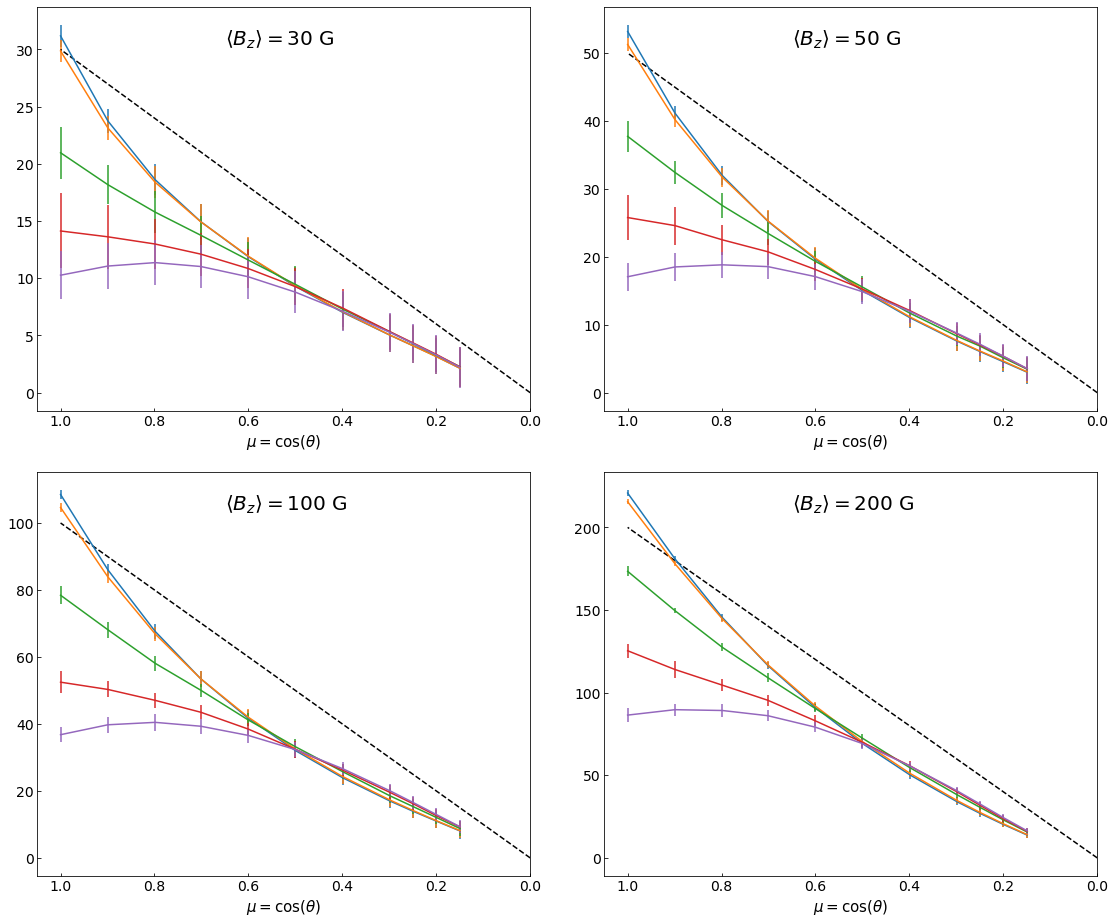

In [21]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30, field_strength = '30', xlabel = True, ylabel = True, mu_lim=11)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_MURaM_50, plot_fdt_50, plot_hrt_50, plot_hmi_50, plot_one_50, field_strength = '50', xlabel = True, ylabel = True, mu_lim=11)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_MURaM_100, plot_fdt_100, plot_hrt_100, plot_hmi_100, plot_one_100, field_strength = '100', xlabel = True, ylabel = True, mu_lim=11)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

# ax_120 = fig.add_subplot(gs[1, 1])
# plot_blos_curves(ax_120, plot_MURaM_120, plot_fdt_120, plot_hrt_120, plot_hmi_120, plot_one_120, field_strength = '120', xlabel = True, ylabel = True)
# y = 0.9*ax_120.get_ylim()[1]
# ax_120.text(0.65,y,r"$\langle B_z \rangle = 120$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200, field_strength = '200', xlabel = True, ylabel = True, mu_lim=11)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


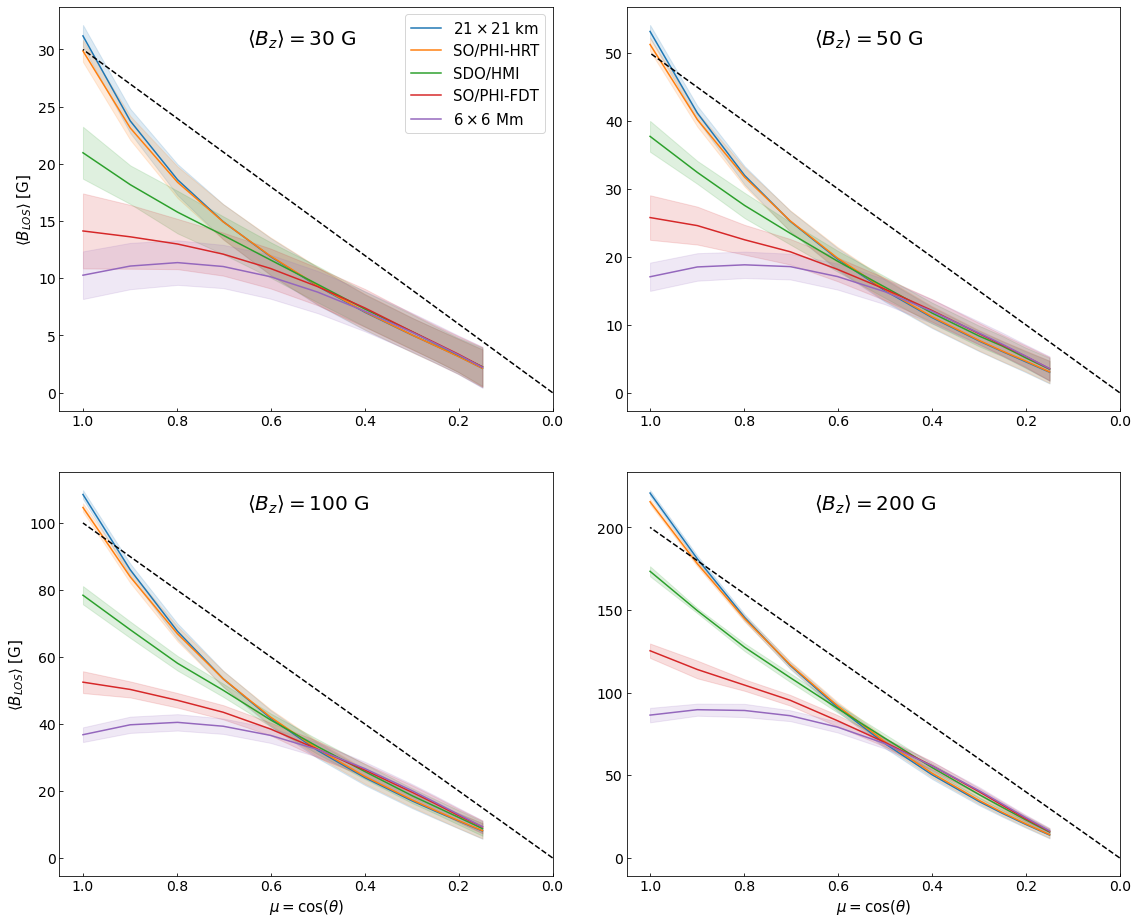

In [22]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30, field_strength='30', xlabel=None, ylabel=True, mu_lim=11, shaded_err=True, plt_legend=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_MURaM_50, plot_fdt_50, plot_hrt_50, plot_hmi_50, plot_one_50, field_strength = '50', xlabel = None, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_MURaM_100, plot_fdt_100, plot_hrt_100, plot_hmi_100, plot_one_100, field_strength = '100', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

# ax_120 = fig.add_subplot(gs[1, 1])
# plot_blos_curves(ax_120, plot_MURaM_120, plot_fdt_120, plot_hrt_120, plot_hmi_120, plot_one_120, field_strength = '120', xlabel = True, ylabel = True)
# y = 0.9*ax_120.get_ylim()[1]
# ax_120.text(0.65,y,r"$\langle B_z \rangle = 120$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200, field_strength = '200', xlabel = True, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


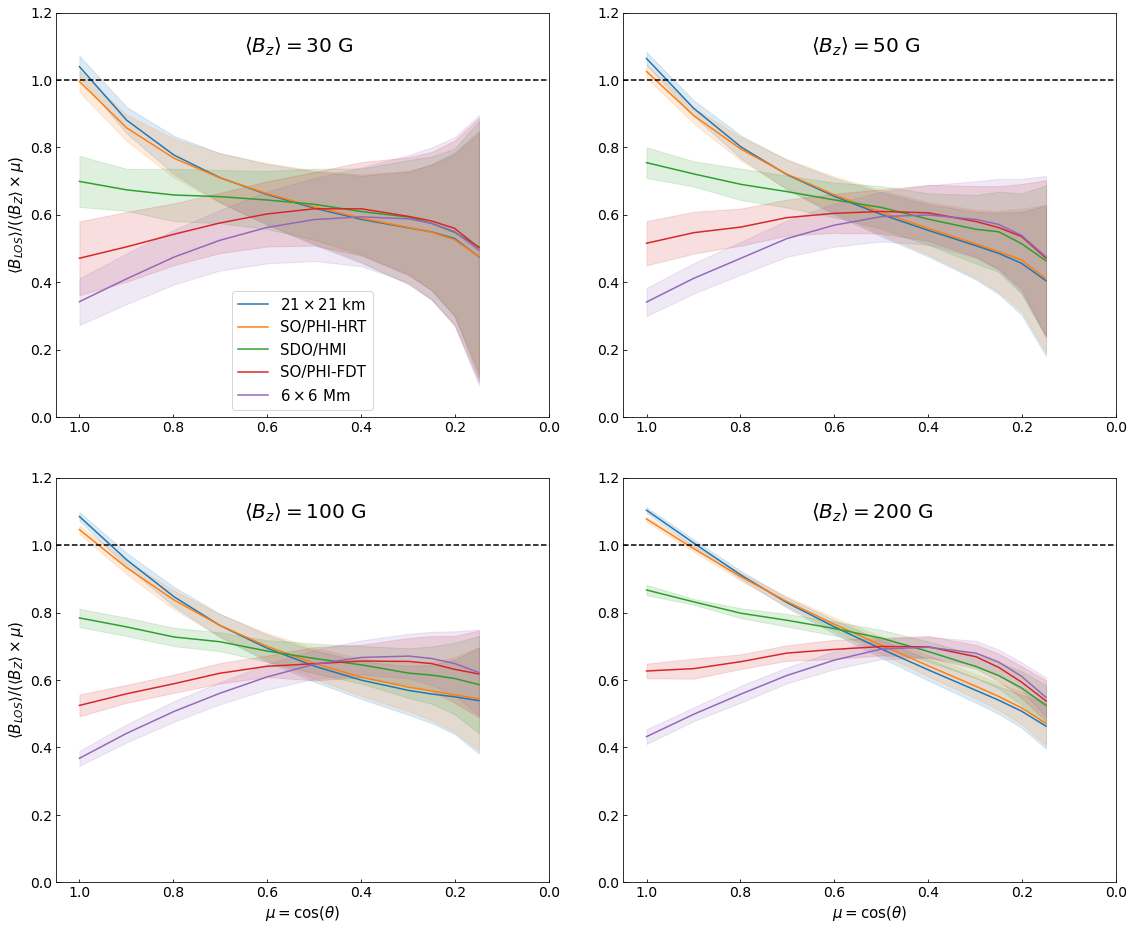

In [17]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30, field_strength = '30', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, div_by_exp = True, plt_legend=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_MURaM_50, plot_fdt_50, plot_hrt_50, plot_hmi_50, plot_one_50, field_strength = '50', xlabel = None, ylabel = None, mu_lim=11, shaded_err = True, div_by_exp = True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_MURaM_100, plot_fdt_100, plot_hrt_100, plot_hmi_100, plot_one_100, field_strength = '100', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True, div_by_exp = True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200, field_strength = '200', xlabel = True, ylabel = None, mu_lim=11, shaded_err = True, div_by_exp = True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.savefig('./plots/6173_blos_clv_frac.png', bbox_inches='tight', dpi=300)
plt.show()

In [24]:
# %matplotlib inline

# fig = plt.figure(figsize = (19,8))
# gs = fig.add_gridspec(1, 2, wspace=0.15, hspace=0.15, height_ratios = [1])

# ax_30 = fig.add_subplot(gs[0, 0])
# plot_blos_curves(ax_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30, field_strength = '30', xlabel = True, ylabel = True)
# y = 0.9*ax_30.get_ylim()[1]
# ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)


# ax_200 = fig.add_subplot(gs[0, 1])
# plot_blos_curves(ax_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200, field_strength = '200', xlabel = True, ylabel = True)
# y = 0.9*ax_200.get_ylim()[1]
# ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

# plt.tight_layout()
# plt.show()

# 5250

In [75]:
#load one results
with open(r"./blos_pickles/cmilos_200_5250_onepix_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_one_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_120_5250_onepix_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_one_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_100_5250_onepix_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_one_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_50_5250_onepix_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_one_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_30_5250_onepix_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_one_30 = cPickle.load(output_file)
    
#res_5250_one_200a,res_5250_one_120a,res_5250_one_100a,res_5250_one_50a,res_5250_one_30a = avg_pos_neg(res_5250_one_200,res_5250_one_120,res_5250_one_100,res_5250_one_50,res_5250_one_30)

In [76]:
plot_5250_one_200,plot_5250_one_120,plot_5250_one_100,plot_5250_one_50,plot_5250_one_30 = get_corr_avg_std_of_pos_neg(res_5250_one_200,res_5250_one_120,res_5250_one_100,res_5250_one_50,res_5250_one_30,std_err = False)

In [77]:
#load hmi results
with open(r"./blos_pickles/cmilos_200_5250_HMI_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_hmi_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_120_5250_HMI_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_hmi_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_100_5250_HMI_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_hmi_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_50_5250_HMI_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_hmi_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_30_5250_HMI_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_hmi_30 = cPickle.load(output_file)
    
#res_5250_hmi_200a,res_5250_hmi_120a,res_5250_hmi_100a,res_5250_hmi_50a,res_5250_hmi_30a = avg_pos_neg(res_5250_hmi_200,res_5250_hmi_120,res_5250_hmi_100,res_5250_hmi_50,res_5250_hmi_30)

In [78]:
plot_5250_hmi_200,plot_5250_hmi_120,plot_5250_hmi_100,plot_5250_hmi_50,plot_5250_hmi_30 = get_corr_avg_std_of_pos_neg(res_5250_hmi_200,res_5250_hmi_120,res_5250_hmi_100,res_5250_hmi_50,res_5250_hmi_30,std_err = False)

In [79]:
plot_5250_hmi_200

[[162.05139287820774,
  142.87922403001835,
  123.22886371631542,
  106.51723787813481,
  89.14981230592521,
  72.49702606566801,
  55.76378787283074,
  40.06806615492727,
  32.694263091370246,
  25.319223395287967,
  17.725090261857417,
  10.370594259547088,
  3.819445410741109],
 [3.5936951956606125,
  2.1435138037889514,
  2.8498770495146846,
  3.01816825580593,
  2.804985096339448,
  2.6370482492804004,
  2.3067831427646803,
  1.9200125400601649,
  1.9332383221395772,
  2.0028120683807975,
  1.8655653285937426,
  1.8823025475142106,
  2.0449137957675014]]

In [80]:
#load fdt results
with open(r"./blos_pickles/cmilos_200_5250_FDT_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_fdt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_120_5250_FDT_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_fdt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_100_5250_FDT_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_fdt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_50_5250_FDT_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_fdt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_30_5250_FDT_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_fdt_30 = cPickle.load(output_file)
    
#res_5250_fdt_200a,res_5250_fdt_120a,res_5250_fdt_100a,res_5250_fdt_50a,res_5250_fdt_30a = avg_pos_neg(res_5250_fdt_200,res_5250_fdt_120,res_5250_fdt_100,res_5250_fdt_50,res_5250_fdt_30)

In [81]:
plot_5250_fdt_200,plot_5250_fdt_120,plot_5250_fdt_100,plot_5250_fdt_50,plot_5250_fdt_30 = get_corr_avg_std_of_pos_neg(res_5250_fdt_200,res_5250_fdt_120,res_5250_fdt_100,res_5250_fdt_50,res_5250_fdt_30,std_err = False)

In [82]:
#load hrt results
with open(r"./blos_pickles/cmilos_200_5250_HRT_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_hrt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_120_5250_HRT_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_hrt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_100_5250_HRT_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_hrt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_50_5250_HRT_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_hrt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_30_5250_HRT_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_hrt_30 = cPickle.load(output_file)
    
#res_5250hrt_200a,res_5250hrt_120a,res_5250hrt_100a,res_5250hrt_50a,res_5250hrt_30a = avg_pos_neg(res_5250hrt_200,res_5250hrt_120,res_5250hrt_100,res_5250hrt_50,res_5250hrt_30)

In [83]:
plot_5250_hrt_200,plot_5250_hrt_120,plot_5250_hrt_100,plot_5250_hrt_50,plot_5250_hrt_30 = get_corr_avg_std_of_pos_neg(res_5250_hrt_200,res_5250_hrt_120,res_5250_hrt_100,res_5250_hrt_50,res_5250_hrt_30,std_err = False)

In [84]:
#load MURaM results
with open(r"./blos_pickles/cmilos_200_5250_MURaM_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_MURaM_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_120_5250_MURaM_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_MURaM_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_100_5250_MURaM_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_MURaM_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_50_5250_MURaM_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_MURaM_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilos_30_5250_MURaM_pixels_pos_neg_noneigh_035.pickle", "rb") as output_file:
    res_5250_MURaM_30 = cPickle.load(output_file)

In [85]:
plot_5250_MURaM_200,plot_5250_MURaM_120,plot_5250_MURaM_100,plot_5250_MURaM_50,plot_5250_MURaM_30 = get_corr_avg_std_of_pos_neg(res_5250_MURaM_200,res_5250_MURaM_120,res_5250_MURaM_100,res_5250_MURaM_50,res_5250_MURaM_30,std_err = False)

# 5250 CLV Blos curves

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


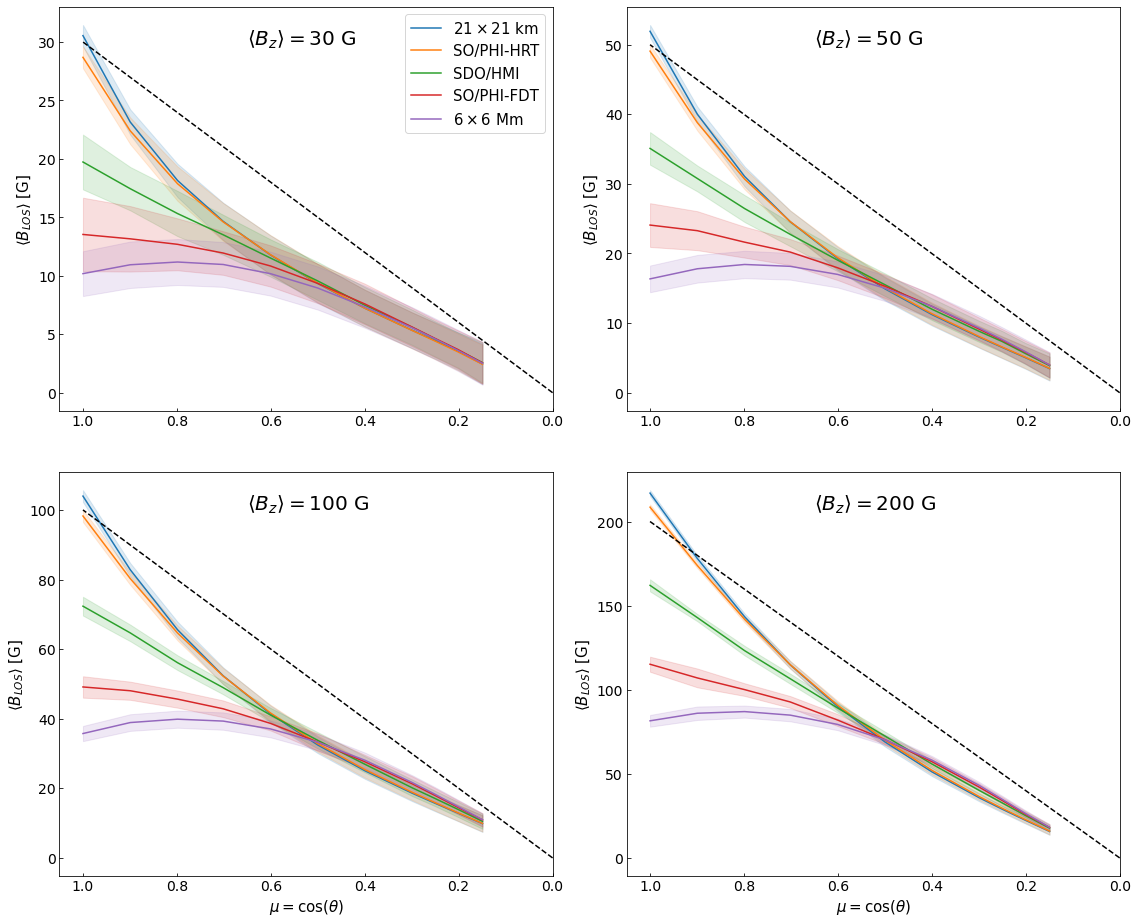

In [36]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_5250_MURaM_30, plot_5250_fdt_30, plot_5250_hrt_30, plot_5250_hmi_30, plot_5250_one_30, field_strength = '30', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, plt_legend=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_5250_MURaM_50, plot_5250_fdt_50, plot_5250_hrt_50, plot_5250_hmi_50, plot_5250_one_50, field_strength = '50', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_5250_MURaM_100, plot_5250_fdt_100, plot_5250_hrt_100, plot_5250_hmi_100, plot_5250_one_100, field_strength = '100', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

# ax_120 = fig.add_subplot(gs[1, 1])
# plot_blos_curves(ax_120, plot_5250_MURaM_120, plot_5250_fdt_120, plot_5250_hrt_120, plot_5250_hmi_120, plot_5250_one_120, field_strength = '120', xlabel = True, ylabel = True)
# y = 0.9*ax_120.get_ylim()[1]
# ax_120.text(0.65,y,r"$\langle B_z \rangle = 120$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_5250_MURaM_200, plot_5250_fdt_200, plot_5250_hrt_200, plot_5250_hmi_200, plot_5250_one_200, field_strength = '200', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

# Differences

In [63]:
def calc_diff_err(plot_6173, plot_5250):
    #sigma_diff**2 = (1/6173)**2 * sigma_5250**2 + (-1/6173**2)**2 * sigma_6173**2
    arr_6173 = np.stack(plot_6173) #shape(5,2,13)
    arr_5250 = np.stack(plot_5250) 
    print(arr_6173.shape)
    print(arr_5250.shape)
    err = np.sqrt((1/arr_6173[:,0,:])**2*arr_5250[:,1,:]**2 + (arr_5250[:,0,:]/arr_6173[:,0,:]**2)**2*arr_6173[:,1,:]**2)
    return err

In [38]:
calc_diff_err([plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], [plot_5250_MURaM_30, plot_5250_fdt_30, plot_5250_hrt_30, plot_5250_hmi_30, plot_5250_one_30])

(5, 2, 13)
(5, 2, 13)


array([[ 0.04199109,  0.06308676,  0.10453818,  0.14671939,  0.19475756,
         0.25037926,  0.3185343 ,  0.43898243,  0.54710356,  0.73042604,
         1.2142829 ,  2.78370456, 19.51811311],
       [ 0.31429112,  0.28526695,  0.23760553,  0.21713191,  0.228173  ,
         0.25463354,  0.32809675,  0.43691174,  0.52654341,  0.69880559,
         1.17534519,  2.45975028, 21.09640269],
       [ 0.04387427,  0.06600716,  0.10830173,  0.14787148,  0.19454222,
         0.24772403,  0.31737467,  0.43992173,  0.54488605,  0.72379273,
         1.17347249,  2.69505534, 16.01075615],
       [ 0.15129886,  0.13548225,  0.16776246,  0.17150497,  0.19090726,
         0.24114963,  0.30264685,  0.4136114 ,  0.50993346,  0.67604577,
         1.14137138,  2.44391584, 11.50514154],
       [ 0.27441845,  0.25488457,  0.24131643,  0.24347101,  0.26564709,
         0.29982962,  0.3583553 ,  0.47546638,  0.58305329,  0.76445759,
         1.23479248,  2.52082732, 19.57579244]])

In [5]:
# 5250 diff plots

def plot_blos_diff_curves(ax, plot_6173, plot_5250, field_strength='30',xlabel = None, \
                          ylabel = r"$(\langle B_{LOS}\rangle^{5250}-\langle B_{LOS}\rangle^{6173})/\langle B_{LOS}\rangle^{6173}$", \
                          title=None, errorbar = True, mu_lim=11, percent = False, lloc = "upper right", plt_legend=False,**kwargs):
    mu_vals = [0.0486,0.1007,0.1493,0.2014,0.25,0.2986,0.3993,0.5,0.6007,0.7014,0.7986,0.8993,1.0]
    plot_MURaM = plot_6173[0]
    plot_fdt = plot_6173[1]
    plot_hrt = plot_6173[2]
    plot_hmi = plot_6173[3]
    plot_one = plot_6173[4]
    
    plot_MURaM_5250 = plot_5250[0]
    plot_fdt_5250 = plot_5250[1]
    plot_hrt_5250 = plot_5250[2]
    plot_hmi_5250 = plot_5250[3]
    plot_one_5250 = plot_5250[4]
    
    fs = float(field_strength)
    
    err = calc_diff_err(plot_6173, plot_5250)
    err_muram = err[0,:mu_lim]
    err_hrt = err[2,:mu_lim]
    err_hmi = err[3,:mu_lim]
    err_fdt = err[1,:mu_lim]
    err_one = err[4,:mu_lim]
    
    y_muram = (np.array(plot_MURaM_5250[0][:mu_lim])-np.array(plot_MURaM[0][:mu_lim]))/np.array(plot_MURaM[0][:mu_lim])
    y_hrt = (np.array(plot_hrt_5250[0][:mu_lim])-np.array(plot_hrt[0][:mu_lim]))/np.array(plot_hrt[0][:mu_lim])
    y_hmi = (np.array(plot_hmi_5250[0][:mu_lim])-np.array(plot_hmi[0][:mu_lim]))/np.array(plot_hmi[0][:mu_lim])
    y_fdt = (np.array(plot_fdt_5250[0][:mu_lim])-np.array(plot_fdt[0][:mu_lim]))/np.array(plot_fdt[0][:mu_lim])
    y_one = (np.array(plot_one_5250[0][:mu_lim])-np.array(plot_one[0][:mu_lim]))/np.array(plot_one[0][:mu_lim])
    
    if percent:
        y_muram*=100
        y_hrt*=100
        y_hmi*=100
        y_fdt*=100
        y_one*=100
        
        err_muram*=100 
        err_hrt*=100
        err_hmi*=100
        err_fdt*=100
        err_one*=100
        
    x = mu_vals[::-1][:mu_lim]
    
    if errorbar:
        ax.errorbar(x, y_muram, yerr = err_muram ,label = r'$21\times 21$ km')
        ax.errorbar(x, y_hrt, yerr = err_hrt, label = 'SO/PHI-HRT')
        ax.errorbar(x, y_hmi, yerr = err_hmi, label = 'SDO/HMI')
        ax.errorbar(x, y_fdt, yerr = err_fdt, label = 'SO/PHI-FDT')
        ax.errorbar(x, y_one, yerr = err_one, label = r'$6\times 6$ Mm')
    if not errorbar:
        #default plot cycle [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
        ax.plot(x, y_muram, label = r'$21\times 21$ km')
        ax.fill_between(x, y_muram-err_muram, y_muram+err_muram, color=u'#1f77b4', alpha=0.2)
        ax.plot(x, y_hrt, label = 'SO/PHI-HRT')
        ax.fill_between(x, y_hrt-err_hrt, y_hrt+err_hrt, color=u'#ff7f0e', alpha=0.2)
        ax.plot(x, y_hmi, label = 'SDO/HMI')
        ax.fill_between(x, y_hmi-err_hmi, y_hmi+err_hmi, color=u'#2ca02c', alpha=0.2)
        ax.plot(x, y_fdt, label = 'SO/PHI-FDT')
        ax.fill_between(x, y_fdt-err_fdt, y_fdt+err_fdt, color=u'#d62728', alpha=0.2)
        ax.plot(x, y_one,  label = r'$6\times 6$ Mm')
        ax.fill_between(x, y_one-err_one, y_one+err_one, color=u'#9467bd', alpha=0.2)
    if title is not None:
        ax.set_title(f"{title}")
    if plt_legend:
        plt.legend(loc=lloc,fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_xlim(1.05,0)
    
    if xlabel is not None:
        ax.set_xlabel(r"$\mu=\cos(\theta)$", fontsize=15)
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontsize=15)

# 5250 - 6173 diff

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


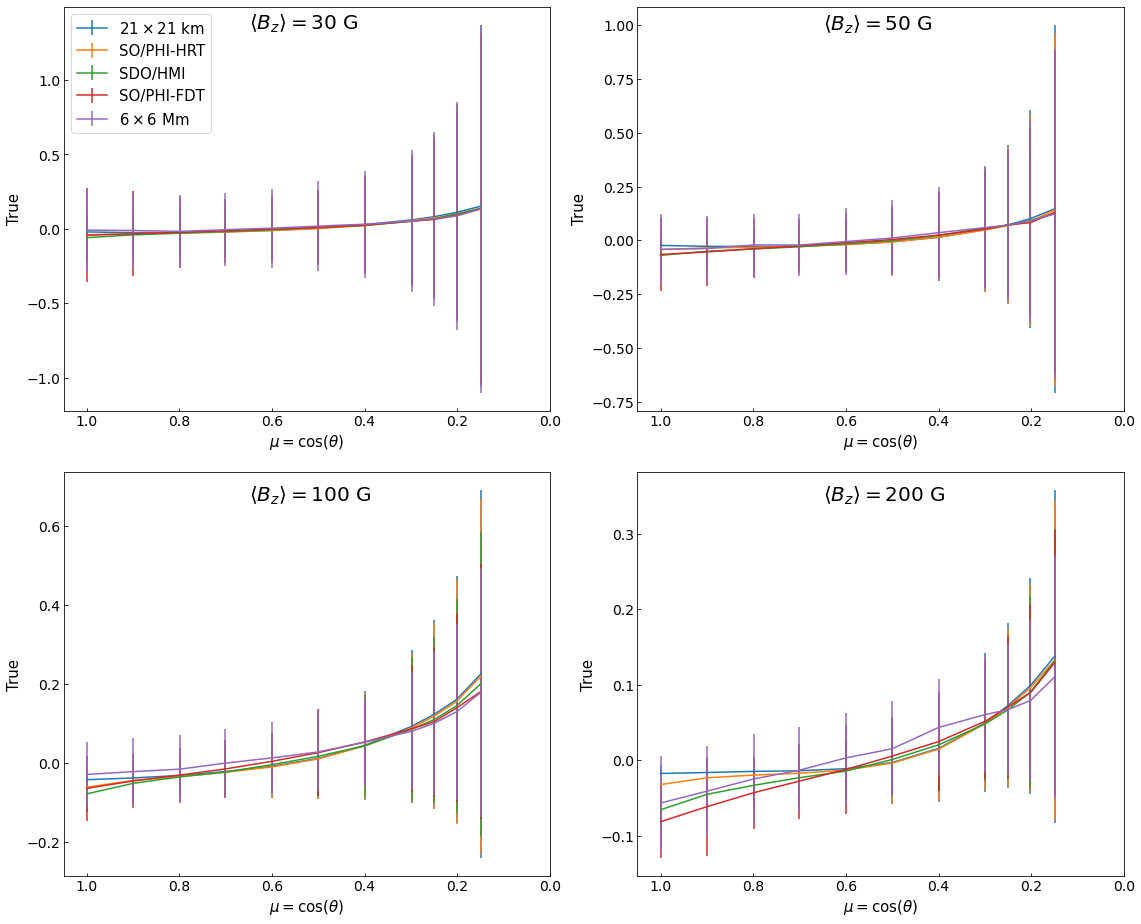

In [40]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], \
                      [plot_5250_MURaM_30, plot_5250_fdt_30, plot_5250_hrt_30, plot_5250_hmi_30, plot_5250_one_30], \
                      field_strength = '30', xlabel = True, ylabel = True, lloc="upper left", plt_legend=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50, [plot_MURaM_50, plot_fdt_50, plot_hrt_50, plot_hmi_50, plot_one_50], \
                      [plot_5250_MURaM_50, plot_5250_fdt_50, plot_5250_hrt_50, plot_5250_hmi_50, plot_5250_one_50], \
                      field_strength = '50', xlabel = True, ylabel = True, lloc="upper left")
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100, [plot_MURaM_100, plot_fdt_100, plot_hrt_100, plot_hmi_100, plot_one_100], \
                      [plot_5250_MURaM_100, plot_5250_fdt_100, plot_5250_hrt_100, plot_5250_hmi_100, plot_5250_one_100], \
                      field_strength = '100', xlabel = True, ylabel = True, lloc="upper left")
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], \
                      [plot_5250_MURaM_200, plot_5250_fdt_200, plot_5250_hrt_200, plot_5250_hmi_200, plot_5250_one_200], \
                      field_strength = '200', xlabel = True, ylabel = True, lloc="upper left")
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


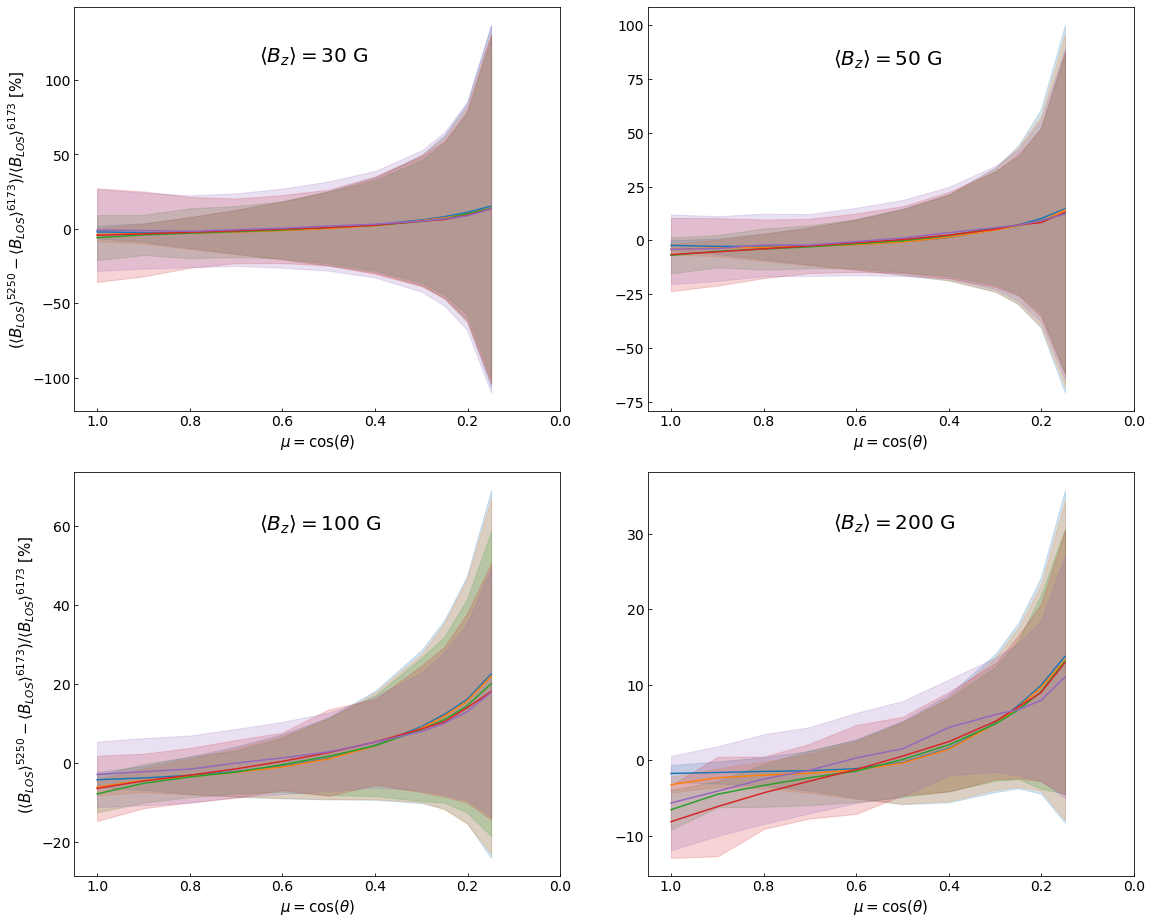

In [41]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], [plot_5250_MURaM_30, plot_5250_fdt_30, plot_5250_hrt_30, plot_5250_hmi_30, plot_5250_one_30], field_strength = '30', xlabel = True, ylabel = r"$(\langle B_{LOS}\rangle^{5250}-\langle B_{LOS}\rangle^{6173})/\langle B_{LOS}\rangle^{6173}$ [%]", percent=True, errorbar=False, lloc="upper left")
y = 0.75*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50, [plot_MURaM_50, plot_fdt_50, plot_hrt_50, plot_hmi_50, plot_one_50], [plot_5250_MURaM_50, plot_5250_fdt_50, plot_5250_hrt_50, plot_5250_hmi_50, plot_5250_one_50], field_strength = '50', xlabel = True, ylabel = None, percent=True, errorbar=False, lloc="upper left")
y = 0.75*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100, [plot_MURaM_100, plot_fdt_100, plot_hrt_100, plot_hmi_100, plot_one_100], [plot_5250_MURaM_100, plot_5250_fdt_100, plot_5250_hrt_100, plot_5250_hmi_100, plot_5250_one_100], field_strength = '100', xlabel = True, ylabel = r"$(\langle B_{LOS}\rangle^{5250}-\langle B_{LOS}\rangle^{6173})/\langle B_{LOS}\rangle^{6173}$ [%]", percent=True, errorbar=False, lloc="upper left")
y = 0.8*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

# ax_120 = fig.add_subplot(gs[1, 1])
# plot_blos_curves(ax_120, plot_MURaM_120, plot_fdt_120, plot_hrt_120, plot_hmi_120, plot_one_120, field_strength = '120', xlabel = True, ylabel = True)
# y = 0.9*ax_120.get_ylim()[1]
# ax_120.text(0.65,y,r"$\langle B_z \rangle = 120$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], [plot_5250_MURaM_200, plot_5250_fdt_200, plot_5250_hrt_200, plot_5250_hmi_200, plot_5250_one_200], field_strength = '200', xlabel = True, ylabel = None,  percent=True, errorbar=False, lloc="upper left")
y = 0.8*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

In [42]:
(np.array(plot_5250_MURaM_200)-np.array(plot_MURaM_200))/np.array(plot_MURaM_200)*100

array([[-1.75142658, -1.62196119, -1.47747636, -1.39439845, -1.1208141 ,
        -0.3014939 ,  1.57973915,  4.96851433,  7.24050463,  9.89362561,
        13.75807743, 19.92881872, 46.92796814],
       [ 0.39696884, -4.39245194, -1.1118961 ,  6.81374089,  7.05443278,
         4.43756509, -1.95674027, -4.93793112, -3.34361196, -0.79198522,
         2.22371054,  2.90517715, -0.66667965]])

# 5250 30 and 200G plus difference

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


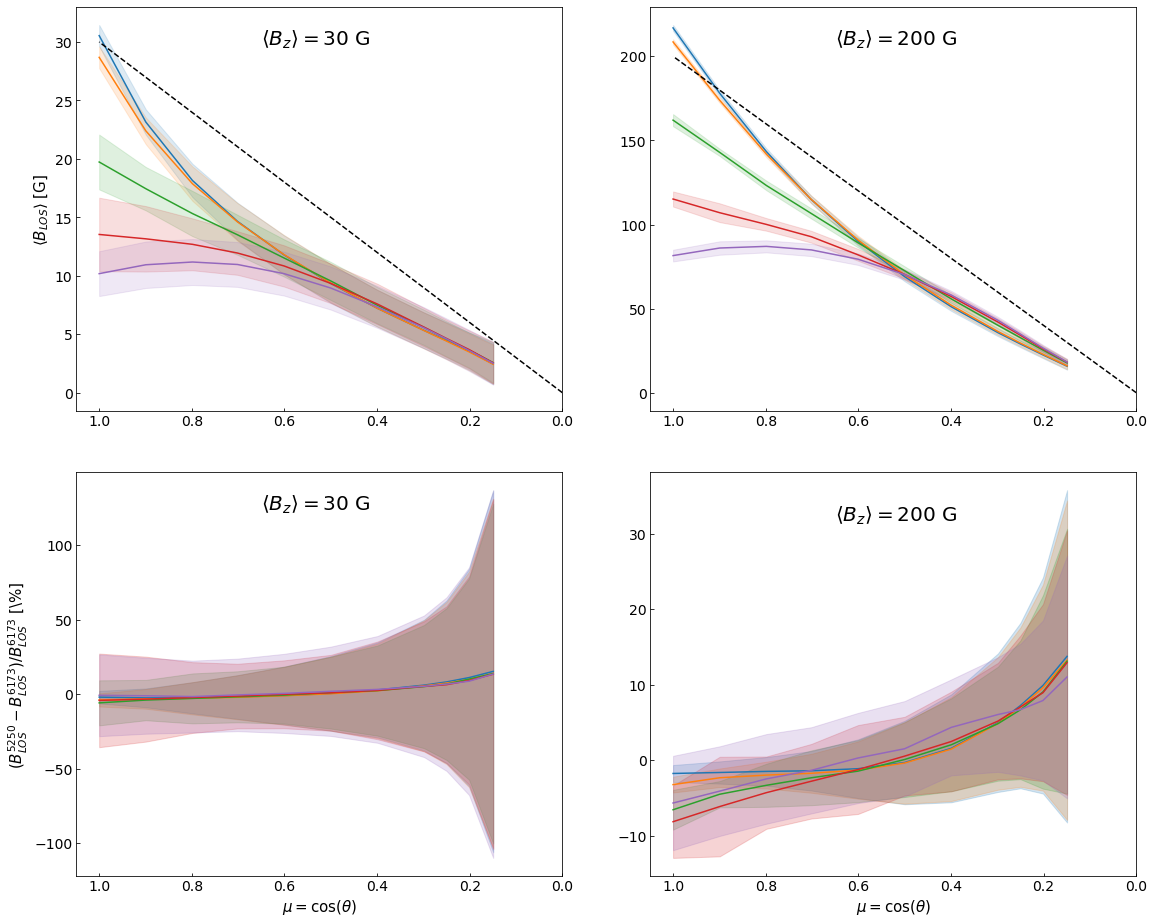

In [43]:
fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30r = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30r, plot_5250_MURaM_30, plot_5250_fdt_30, plot_5250_hrt_30, plot_5250_hmi_30, plot_5250_one_30, field_strength = '30', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_30r.get_ylim()[1]
ax_30r.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_200r = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_200r, plot_5250_MURaM_200, plot_5250_fdt_200, plot_5250_hrt_200, plot_5250_hmi_200, plot_5250_one_200, field_strength = '200', xlabel = None, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_200r.get_ylim()[1]
ax_200r.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

ax_30 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_30, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], [plot_5250_MURaM_30, plot_5250_fdt_30, plot_5250_hrt_30, plot_5250_hmi_30, plot_5250_one_30], \
                      field_strength = '30', xlabel = True, ylabel = r"$(B_{LOS}^{5250}-B_{LOS}^{6173})/B_{LOS}^{6173}$ [\%]", errorbar=False, percent=True)
y = 0.83*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], [plot_5250_MURaM_200, plot_5250_fdt_200, plot_5250_hrt_200, plot_5250_hmi_200, plot_5250_one_200], \
                      field_strength = '200', xlabel = True, ylabel = None, errorbar=False, percent=True)
#ax_200.set_ylim(ax_30.get_ylim()[0],ax_30.get_ylim()[1])
y = 0.83*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

# 6173 MDI

In [5]:
#load one pixel results
with open(r"./blos_pickles/mdi_200_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_120_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_100_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_50_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_30_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_30 = cPickle.load(output_file)

In [6]:
plot_MDI_one_200,plot_MDI_one_120,plot_MDI_one_100,plot_MDI_one_50,plot_MDI_one_30 = get_corr_avg_std_of_pos_neg(res_one_200,res_one_120,res_one_100,res_one_50,res_one_30,std_err = False)

In [7]:
#load hmi results
with open(r"./blos_pickles/mdi_200_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_120_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_100_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_50_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_30_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_30 = cPickle.load(output_file)
    
#res_hmi_200a,res_hmi_120a,res_hmi_100a,res_hmi_50a,res_hmi_30a = avg_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30)

In [8]:
plot_MDI_hmi_200,plot_MDI_hmi_120,plot_MDI_hmi_100,plot_MDI_hmi_50,plot_MDI_hmi_30 = get_corr_avg_std_of_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30,std_err = False)

In [9]:
#load fdt results
with open(r"./blos_pickles/mdi_200_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_120_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_100_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_50_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_30_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_30 = cPickle.load(output_file)
    
#res_fdt_200a,res_fdt_120a,res_fdt_100a,res_fdt_50a,res_fdt_30a = avg_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30)

In [10]:
plot_MDI_fdt_200,plot_MDI_fdt_120,plot_MDI_fdt_100,plot_MDI_fdt_50,plot_MDI_fdt_30 = get_corr_avg_std_of_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30,std_err = False)

In [11]:
#load hrt results
with open(r"./blos_pickles/mdi_200_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_120_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_100_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_50_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_30_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_30 = cPickle.load(output_file)
    
#res_hrt_200a,res_hrt_120a,res_hrt_100a,res_hrt_50a,res_hrt_30a = avg_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30)

In [12]:
plot_MDI_hrt_200,plot_MDI_hrt_120,plot_MDI_hrt_100,plot_MDI_hrt_50,plot_MDI_hrt_30 = get_corr_avg_std_of_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30,std_err = False)

In [13]:
#load MURaM results
with open(r"./blos_pickles/mdi_200_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_120_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_100_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_50_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_30_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_30 = cPickle.load(output_file)

In [14]:
plot_MDI_MURaM_200,plot_MDI_MURaM_120,plot_MDI_MURaM_100,plot_MDI_MURaM_50,plot_MDI_MURaM_30 = get_corr_avg_std_of_pos_neg(res_MURaM_200,res_MURaM_120,res_MURaM_100,res_MURaM_50,res_MURaM_30,std_err = False)

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


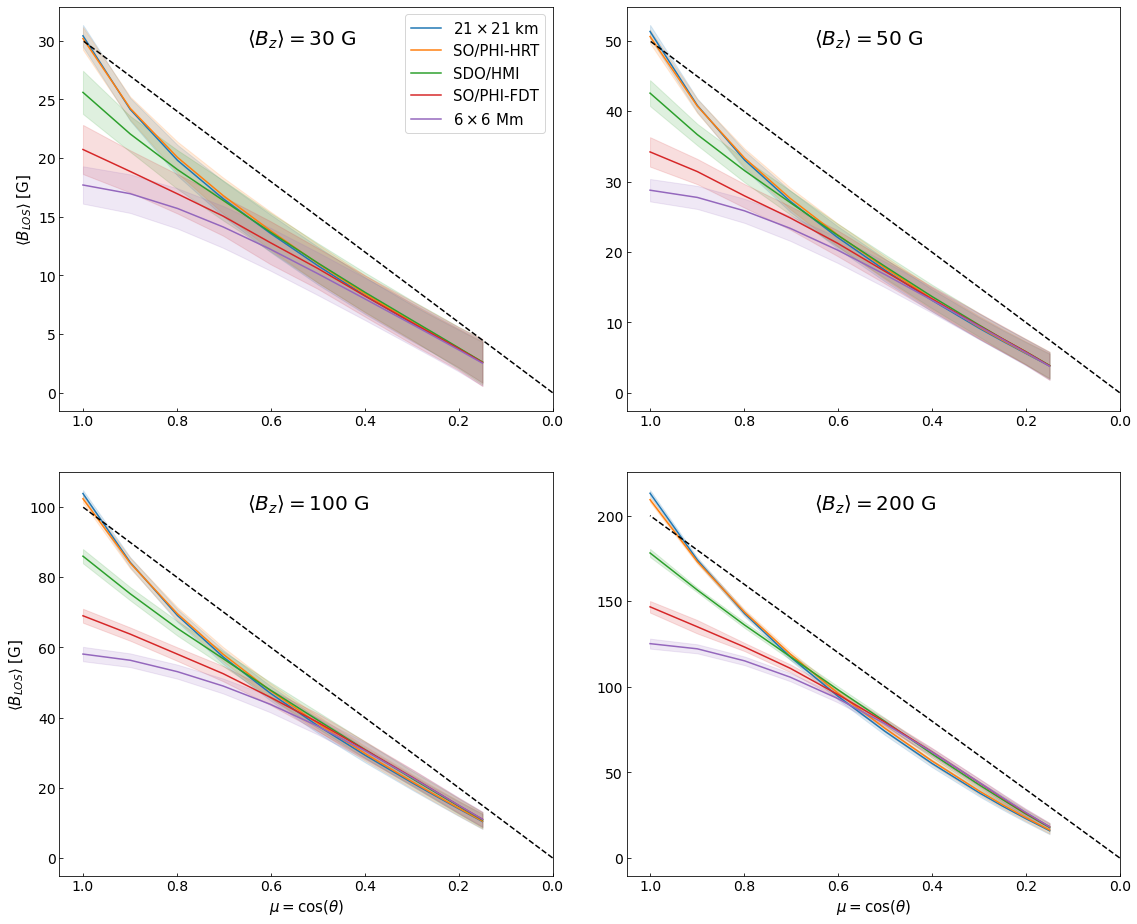

In [54]:
%matplotlib inline
#MDI

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30, field_strength = '30', \
                 xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, plt_legend=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_MDI_MURaM_50, plot_MDI_fdt_50, plot_MDI_hrt_50, plot_MDI_hmi_50, plot_MDI_one_50, field_strength = '50', \
                 xlabel = None, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_MDI_MURaM_100, plot_MDI_fdt_100, plot_MDI_hrt_100, plot_MDI_hmi_100, plot_MDI_one_100, field_strength = '100', \
                 xlabel = True, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200, field_strength = '200', \
                 xlabel = True, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


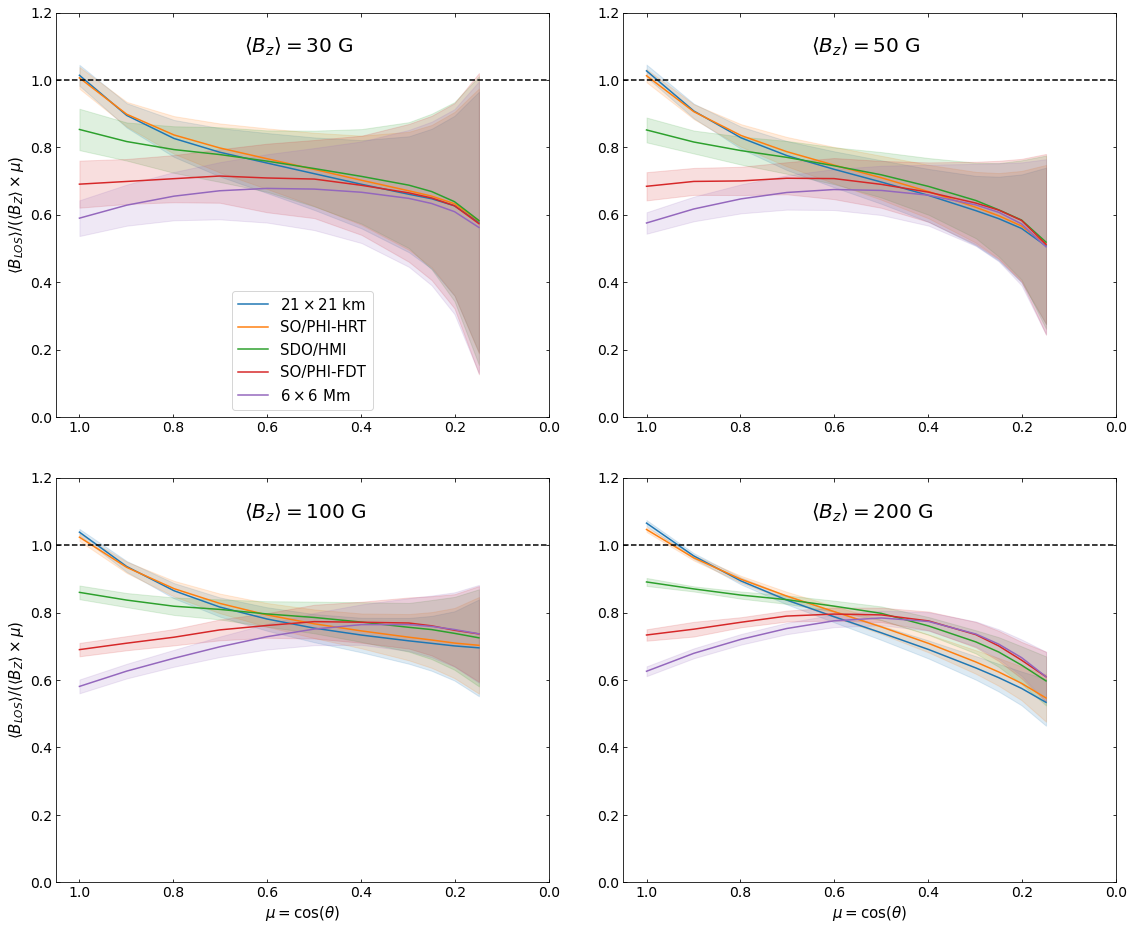

In [16]:
%matplotlib inline
#MDI

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30, field_strength = '30', \
                 xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, plt_legend=True, div_by_exp=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_MDI_MURaM_50, plot_MDI_fdt_50, plot_MDI_hrt_50, plot_MDI_hmi_50, plot_MDI_one_50, field_strength = '50', \
                 xlabel = None, ylabel = None, mu_lim=11, shaded_err = True, div_by_exp=True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_MDI_MURaM_100, plot_MDI_fdt_100, plot_MDI_hrt_100, plot_MDI_hmi_100, plot_MDI_one_100, field_strength = '100', \
                 xlabel = True, ylabel = True, mu_lim=11, shaded_err = True, div_by_exp=True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200, field_strength = '200', \
                 xlabel = True, ylabel = None, mu_lim=11, shaded_err = True, div_by_exp=True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.savefig('./plots/mdi_blos_clv_frac_ticks.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


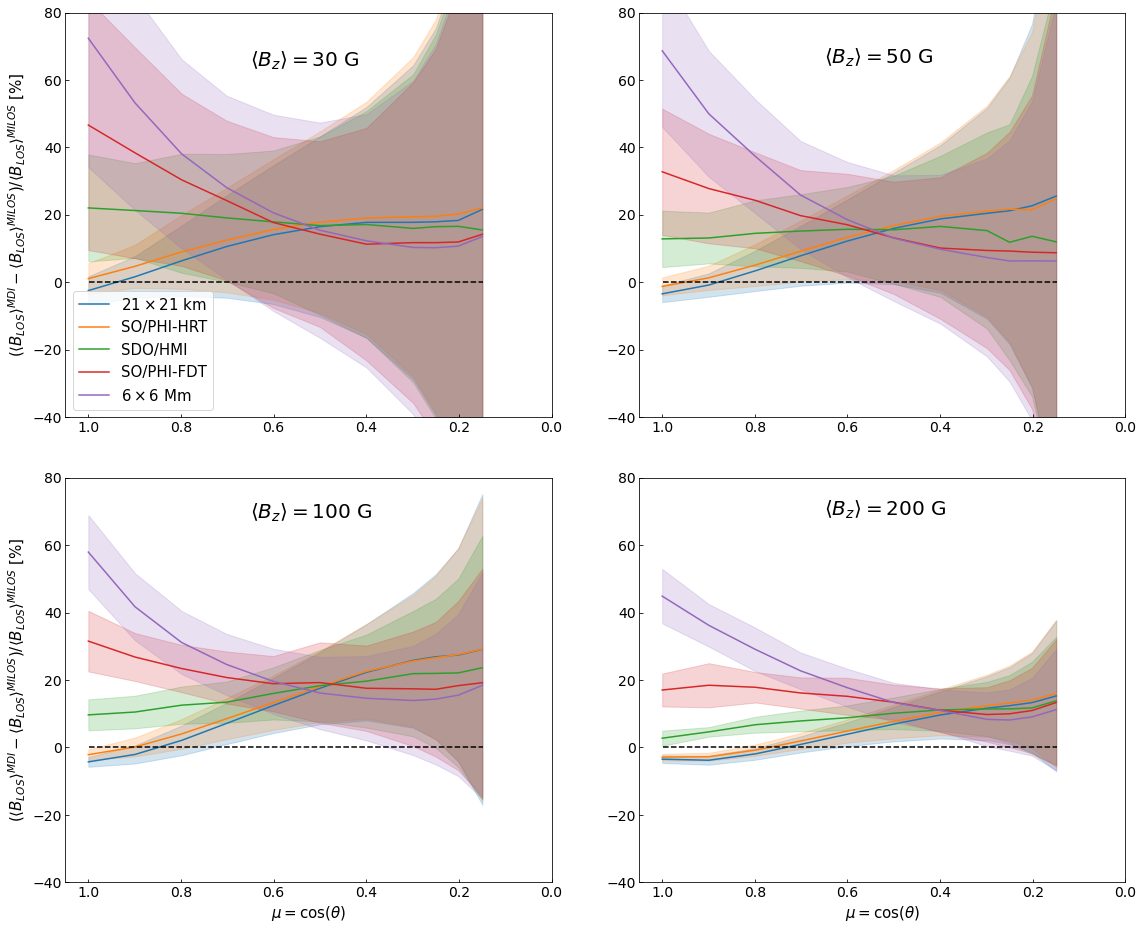

In [74]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], \
                      [plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30], \
                      field_strength = '30', xlabel = None, \
                      ylabel = r"$(\langle B_{LOS}\rangle^{MDI}-\langle B_{LOS}\rangle^{MILOS})/\langle B_{LOS}\rangle^{MILOS}$ [%]", \
                      errorbar=False, percent=True, lloc = "lower left", plt_legend=True)
plt.ylim(-40,80)
ax_30.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
y = 0.8*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50, [plot_MURaM_50, plot_fdt_50, plot_hrt_50, plot_hmi_50, plot_one_50], \
                      [plot_MDI_MURaM_50, plot_MDI_fdt_50, plot_MDI_hrt_50, plot_MDI_hmi_50, plot_MDI_one_50], \
                      field_strength = '50', xlabel = None, ylabel = None, errorbar=False, percent=True, lloc = "upper center")
plt.ylim(-40,80)
ax_50.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
y = 0.81*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100, [plot_MURaM_100, plot_fdt_100, plot_hrt_100, plot_hmi_100, plot_one_100], \
                      [plot_MDI_MURaM_100, plot_MDI_fdt_100, plot_MDI_hrt_100, plot_MDI_hmi_100, plot_MDI_one_100], \
                      field_strength = '100', xlabel = True, \
                      ylabel = r"$(\langle B_{LOS}\rangle^{MDI}-\langle B_{LOS}\rangle^{MILOS})/\langle B_{LOS}\rangle^{MILOS}$ [%]", \
                      errorbar=False, percent=True, lloc = "upper center")
plt.ylim(-40,80)
y = 0.85*ax_100.get_ylim()[1]
ax_100.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], \
                      [plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200], \
                      field_strength = '200', xlabel = True, ylabel = None, errorbar=False, percent=True, lloc = "upper center")
plt.ylim(-40,80)
y = 0.86*ax_200.get_ylim()[1]
ax_200.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.savefig('./plots/milos_mdi_diff_fixed_lims.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

In [56]:
plot_MDI_MURaM_30

[[30.416543023846838,
  24.14133002495568,
  19.800969507135957,
  16.53286389709462,
  13.581244511512509,
  10.829900839265392,
  8.271823193003408,
  5.920845805787915,
  4.857189355867588,
  3.78685624757511,
  2.5901447373803705,
  1.4763461039305945,
  0.30923236567365336],
 [0.9279376870595781,
  0.9752715208652786,
  1.3131497559815815,
  1.5084559372926893,
  1.603129203397284,
  1.6136400083157894,
  1.5680457128576595,
  1.5407447946301807,
  1.5567700092167038,
  1.612941442985844,
  1.7328801113346115,
  1.9835613916274515,
  2.6705750970551203]]

# MDI Blos + difference plot

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


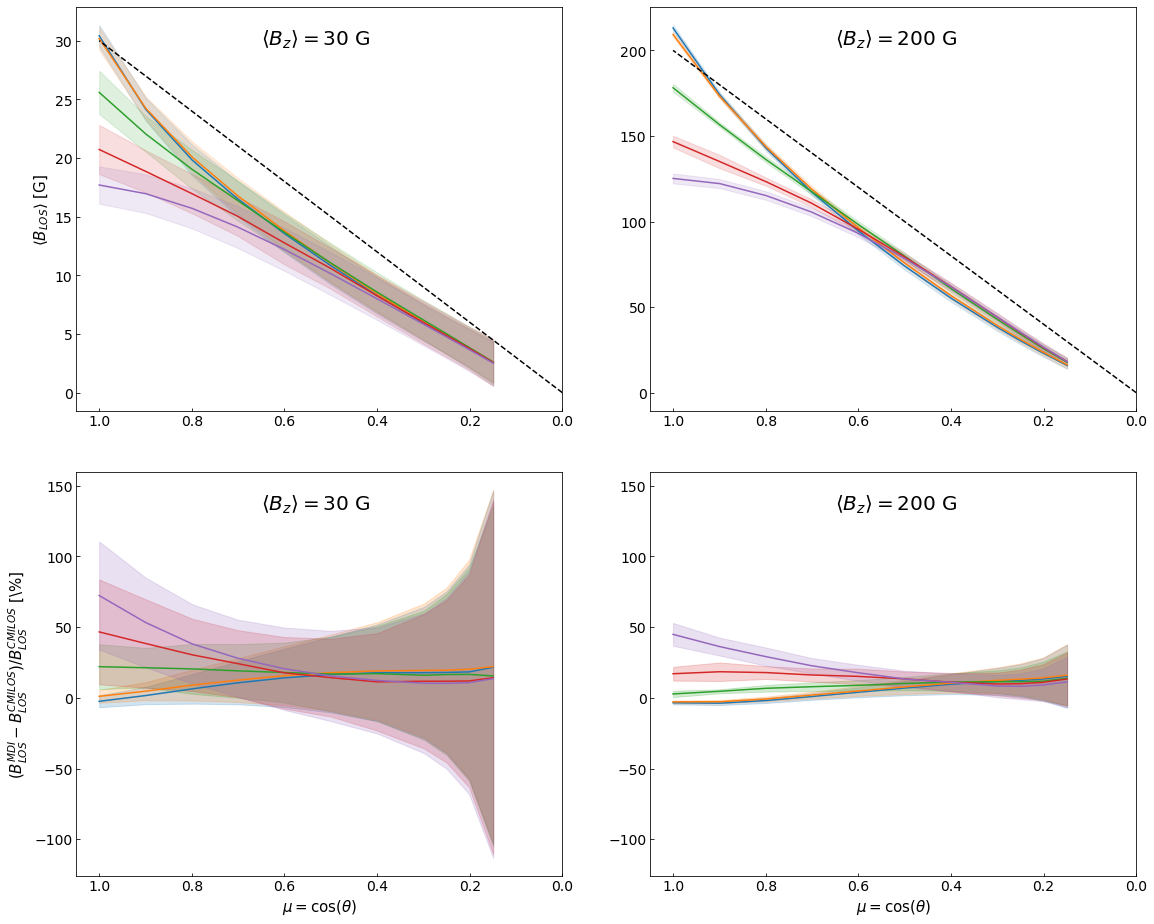

In [57]:
fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30r = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30r, plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30, field_strength = '30', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_30r.get_ylim()[1]
ax_30r.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_200r = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_200r, plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200, field_strength = '200', xlabel = None, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_200r.get_ylim()[1]
ax_200r.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

ax_30 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_30, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], [plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30], \
                      field_strength = '30', xlabel = True, ylabel = r"$(B_{LOS}^{MDI}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [\%]", errorbar=False, percent=True)
y = 0.83*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], [plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200], \
                      field_strength = '200', xlabel = True, ylabel = None, errorbar=False, percent=True)
ax_200.set_ylim(ax_30.get_ylim()[0],ax_30.get_ylim()[1])
y = 0.83*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


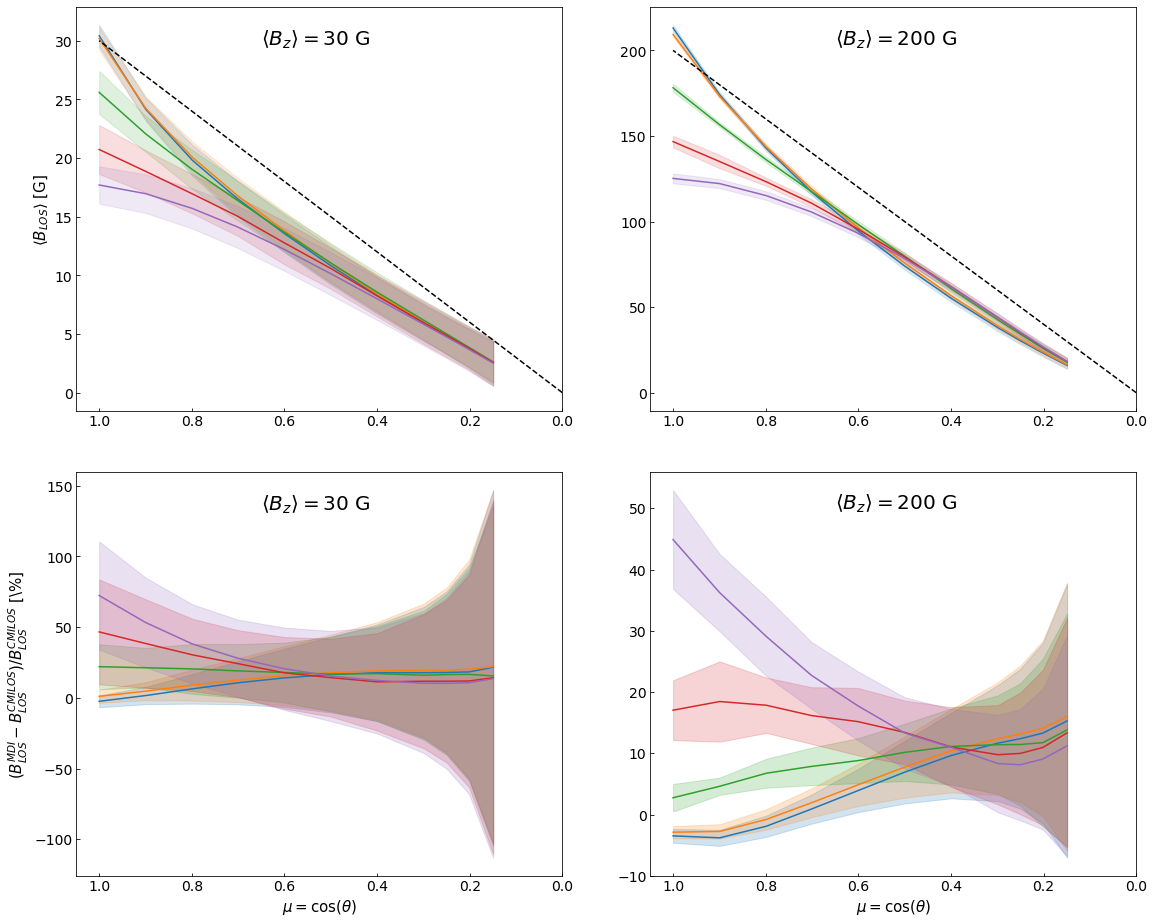

In [58]:
fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30r = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30r, plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30, field_strength = '30', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_30r.get_ylim()[1]
ax_30r.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_200r = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_200r, plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200, field_strength = '200', xlabel = None, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_200r.get_ylim()[1]
ax_200r.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

ax_30 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_30, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], [plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30], \
                      field_strength = '30', xlabel = True, ylabel = r"$(B_{LOS}^{MDI}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [\%]", errorbar=False, percent=True)
y = 0.83*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], [plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200], \
                      field_strength = '200', xlabel = True, ylabel = None, errorbar=False, percent=True)
#ax_200.set_ylim(ax_30.get_ylim()[0],ax_30.get_ylim()[1])
y = 0.89*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


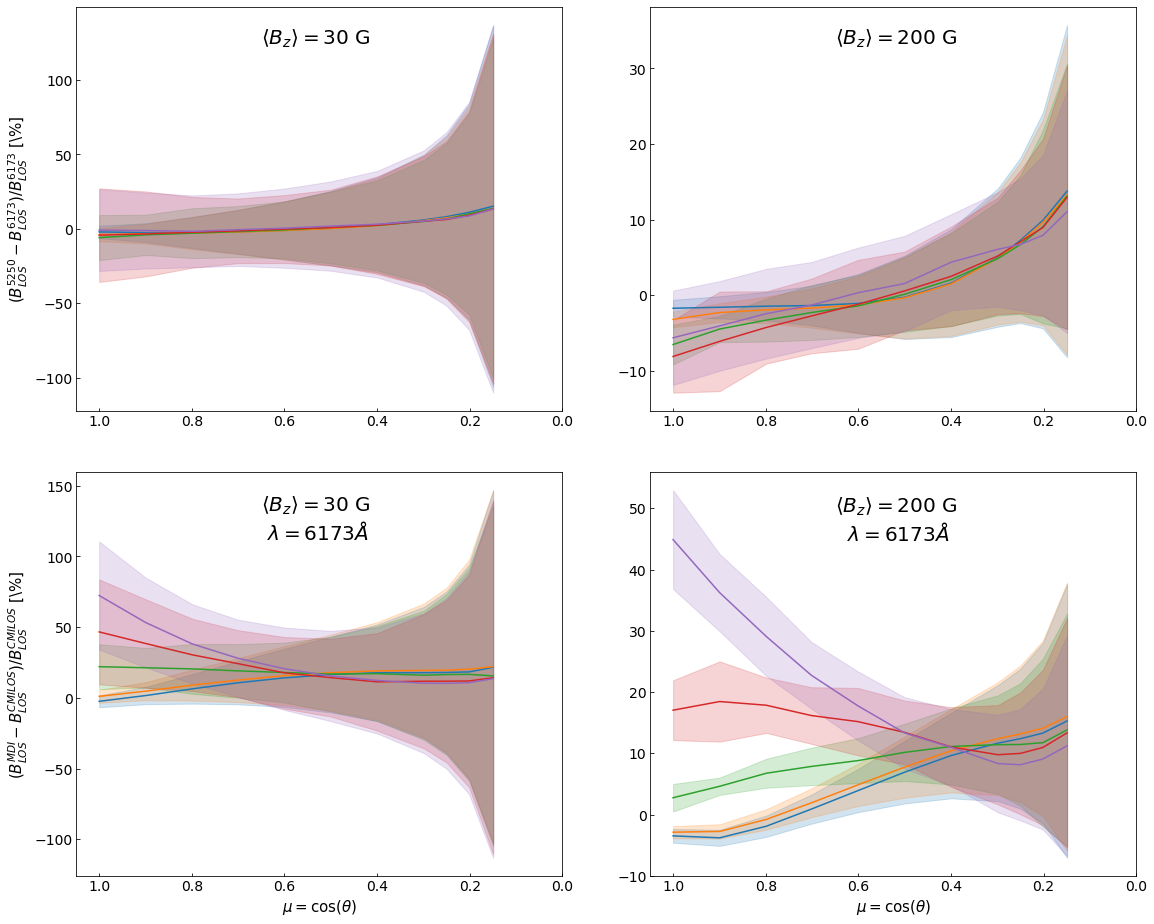

In [59]:
fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30r = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30r, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], [plot_5250_MURaM_30, plot_5250_fdt_30, plot_5250_hrt_30, plot_5250_hmi_30, plot_5250_one_30], \
                      field_strength = '30', xlabel = None, ylabel = r"$(B_{LOS}^{5250}-B_{LOS}^{6173})/B_{LOS}^{6173}$ [\%]", errorbar=False, percent=True)
y = 0.83*ax_30r.get_ylim()[1]
ax_30r.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_200r = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_200r, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], [plot_5250_MURaM_200, plot_5250_fdt_200, plot_5250_hrt_200, plot_5250_hmi_200, plot_5250_one_200], \
                      field_strength = '200', xlabel = None, ylabel = None, errorbar=False, percent=True)
#ax_200.set_ylim(ax_30.get_ylim()[0],ax_30.get_ylim()[1])
y = 0.87*ax_200r.get_ylim()[1]
ax_200r.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

ax_30 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_30, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], [plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30], \
                      field_strength = '30', xlabel = True, ylabel = r"$(B_{LOS}^{MDI}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [\%]", errorbar=False, percent=True)
y = 0.7*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G""\n"r" $\lambda=6173\AA$", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], [plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200], \
                      field_strength = '200', xlabel = True, ylabel = None, errorbar=False, percent=True)
#ax_200.set_ylim(ax_30.get_ylim()[0],ax_30.get_ylim()[1])
y = 0.8*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G""\n"r"  $\lambda=6173\AA$", fontsize=20)

plt.tight_layout()
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


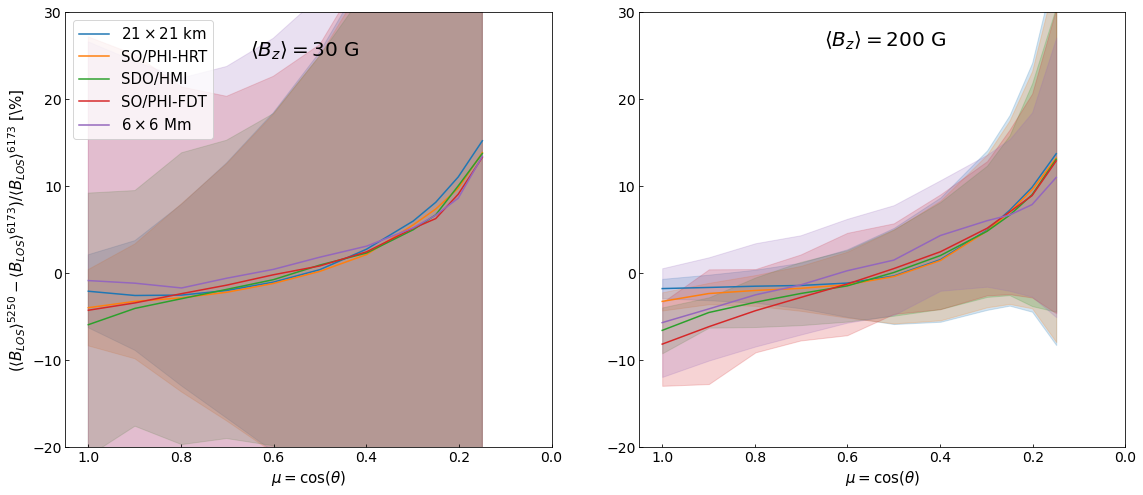

In [89]:
fig = plt.figure(figsize = (19,8))
gs = fig.add_gridspec(1, 2, wspace=0.18, hspace=0.15)
maxl = 30
minl = -20
ax_30r = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30r, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], [plot_5250_MURaM_30, plot_5250_fdt_30, plot_5250_hrt_30, plot_5250_hmi_30, plot_5250_one_30], \
                      field_strength = '30', xlabel = True, \
                      ylabel = r"$(\langle B_{LOS}\rangle^{5250}-\langle B_{LOS}\rangle^{6173})/\langle B_{LOS}\rangle^{6173}$ [\%]", \
                      errorbar=False, percent=True, lloc = "upper left", plt_legend=True)
plt.ylim(minl,maxl)
y = 0.83*ax_30r.get_ylim()[1]
ax_30r.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_200r = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_200r, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], [plot_5250_MURaM_200, plot_5250_fdt_200, plot_5250_hrt_200, plot_5250_hmi_200, plot_5250_one_200], \
                      field_strength = '200', xlabel = True, ylabel = None, errorbar=False, percent=True, lloc = "upper left")
#ax_200.set_ylim(ax_30.get_ylim()[0],ax_30.get_ylim()[1])
plt.ylim(minl,maxl)
y = 0.87*ax_200r.get_ylim()[1]
ax_200r.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

# ax_30 = fig.add_subplot(gs[1, 0])
# plot_blos_diff_curves(ax_30, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], [plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30], \
#                       field_strength = '30', xlabel = True, ylabel = r"$(B_{LOS}^{MDI}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [\%]", errorbar=False, percent=True)
# y = 0.7*ax_30.get_ylim()[1]
# ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G""\n"r" $\lambda=6173\AA$", fontsize=20)

# ax_200 = fig.add_subplot(gs[1, 1])
# plot_blos_diff_curves(ax_200, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], [plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200], \
#                       field_strength = '200', xlabel = True, ylabel = None, errorbar=False, percent=True)
# #ax_200.set_ylim(ax_30.get_ylim()[0],ax_30.get_ylim()[1])
# y = 0.8*ax_200.get_ylim()[1]
# ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G""\n"r"  $\lambda=6173\AA$", fontsize=20)

plt.tight_layout()
plt.savefig('./plots/5250_6173_diff_clv_blos_lims.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


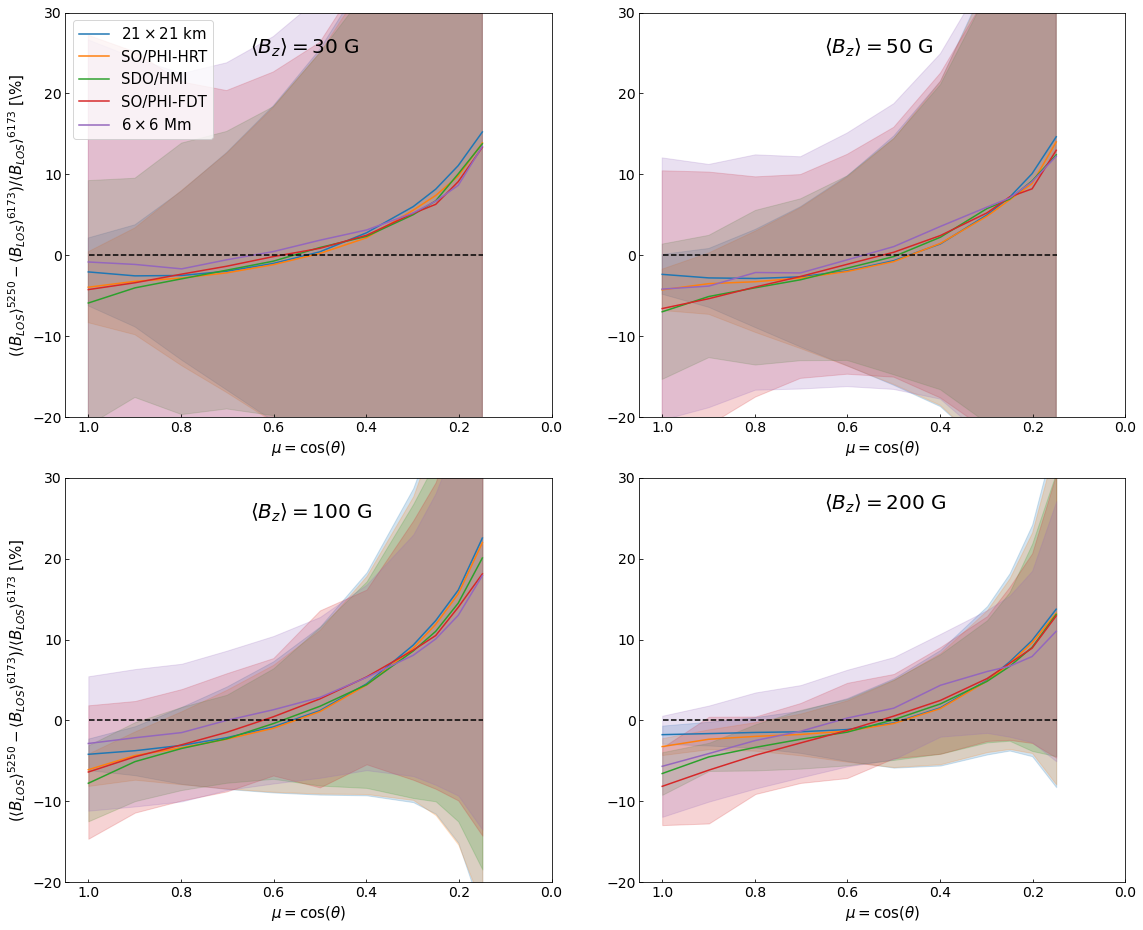

In [94]:
fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15)
maxl = 30
minl = -20
ax_30r = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30r, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], \
                      [plot_5250_MURaM_30, plot_5250_fdt_30, plot_5250_hrt_30, plot_5250_hmi_30, plot_5250_one_30], \
                      field_strength = '30', xlabel = True, \
                      ylabel = r"$(\langle B_{LOS}\rangle^{5250}-\langle B_{LOS}\rangle^{6173})/\langle B_{LOS}\rangle^{6173}$ [\%]", \
                      errorbar=False, percent=True, lloc = "upper left", plt_legend=True)
plt.ylim(minl,maxl)
y = 0.83*ax_30r.get_ylim()[1]
ax_30r.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
ax_30r.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50r = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50r, [plot_MURaM_50, plot_fdt_50, plot_hrt_50, plot_hmi_50, plot_one_50], [plot_5250_MURaM_50, plot_5250_fdt_50, plot_5250_hrt_50, plot_5250_hmi_50, plot_5250_one_50], \
                      field_strength = '50', xlabel = True, \
                      ylabel = None, \
                      errorbar=False, percent=True, lloc = "upper left", plt_legend=False)
plt.ylim(minl,maxl)
y = 0.83*ax_50r.get_ylim()[1]
ax_50r.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
ax_50r.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100r = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100r, [plot_MURaM_100, plot_fdt_100, plot_hrt_100, plot_hmi_100, plot_one_100], \
                      [plot_5250_MURaM_100, plot_5250_fdt_100, plot_5250_hrt_100, plot_5250_hmi_100, plot_5250_one_100], \
                      field_strength = '100', xlabel = True, \
                      ylabel = r"$(\langle B_{LOS}\rangle^{5250}-\langle B_{LOS}\rangle^{6173})/\langle B_{LOS}\rangle^{6173}$ [\%]", \
                      errorbar=False, percent=True, lloc = "upper left", plt_legend=False)
plt.ylim(minl,maxl)
y = 0.83*ax_100r.get_ylim()[1]
ax_100r.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
ax_100r.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200r = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200r, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], [plot_5250_MURaM_200, plot_5250_fdt_200, plot_5250_hrt_200, plot_5250_hmi_200, plot_5250_one_200], \
                      field_strength = '200', xlabel = True, ylabel = None, errorbar=False, percent=True, lloc = "upper left")
#ax_200.set_ylim(ax_30.get_ylim()[0],ax_30.get_ylim()[1])
plt.ylim(minl,maxl)
y = 0.87*ax_200r.get_ylim()[1]
ax_200r.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
ax_200r.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.savefig('./plots/5250_6173_diff_clv_blos_lims_4panels.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

# 6173 COG

In [17]:
#load one pixel results
with open(r"./blos_pickles/cog_200_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_120_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_100_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_50_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_30_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_30 = cPickle.load(output_file)

In [18]:
plot_COG_one_200,plot_COG_one_120,plot_COG_one_100,plot_COG_one_50,plot_COG_one_30 = get_corr_avg_std_of_pos_neg(res_one_200,res_one_120,res_one_100,res_one_50,res_one_30,std_err = False)

In [19]:
#load hmi results
with open(r"./blos_pickles/cog_200_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_120_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_100_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_50_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_30_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_30 = cPickle.load(output_file)
    
#res_hmi_200a,res_hmi_120a,res_hmi_100a,res_hmi_50a,res_hmi_30a = avg_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30)

In [20]:
plot_COG_hmi_200,plot_COG_hmi_120,plot_COG_hmi_100,plot_COG_hmi_50,plot_COG_hmi_30 = get_corr_avg_std_of_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30,std_err = False)

In [21]:
#load fdt results
with open(r"./blos_pickles/cog_200_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_120_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_100_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_50_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_30_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_30 = cPickle.load(output_file)
    
#res_fdt_200a,res_fdt_120a,res_fdt_100a,res_fdt_50a,res_fdt_30a = avg_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30)

In [22]:
plot_COG_fdt_200,plot_COG_fdt_120,plot_COG_fdt_100,plot_COG_fdt_50,plot_COG_fdt_30 = get_corr_avg_std_of_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30,std_err = False)

In [23]:
#load hrt results
with open(r"./blos_pickles/cog_200_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_120_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_100_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_50_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_30_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_30 = cPickle.load(output_file)
    
#res_hrt_200a,res_hrt_120a,res_hrt_100a,res_hrt_50a,res_hrt_30a = avg_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30)

In [24]:
plot_COG_hrt_200,plot_COG_hrt_120,plot_COG_hrt_100,plot_COG_hrt_50,plot_COG_hrt_30 = get_corr_avg_std_of_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30,std_err = False)

In [25]:
#load MURaM results
with open(r"./blos_pickles/cog_200_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_120_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_100_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_50_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_30_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_30 = cPickle.load(output_file)

In [26]:
plot_COG_MURaM_200,plot_COG_MURaM_120,plot_COG_MURaM_100,plot_COG_MURaM_50,plot_COG_MURaM_30 = get_corr_avg_std_of_pos_neg(res_MURaM_200,res_MURaM_120,res_MURaM_100,res_MURaM_50,res_MURaM_30,std_err = False)

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


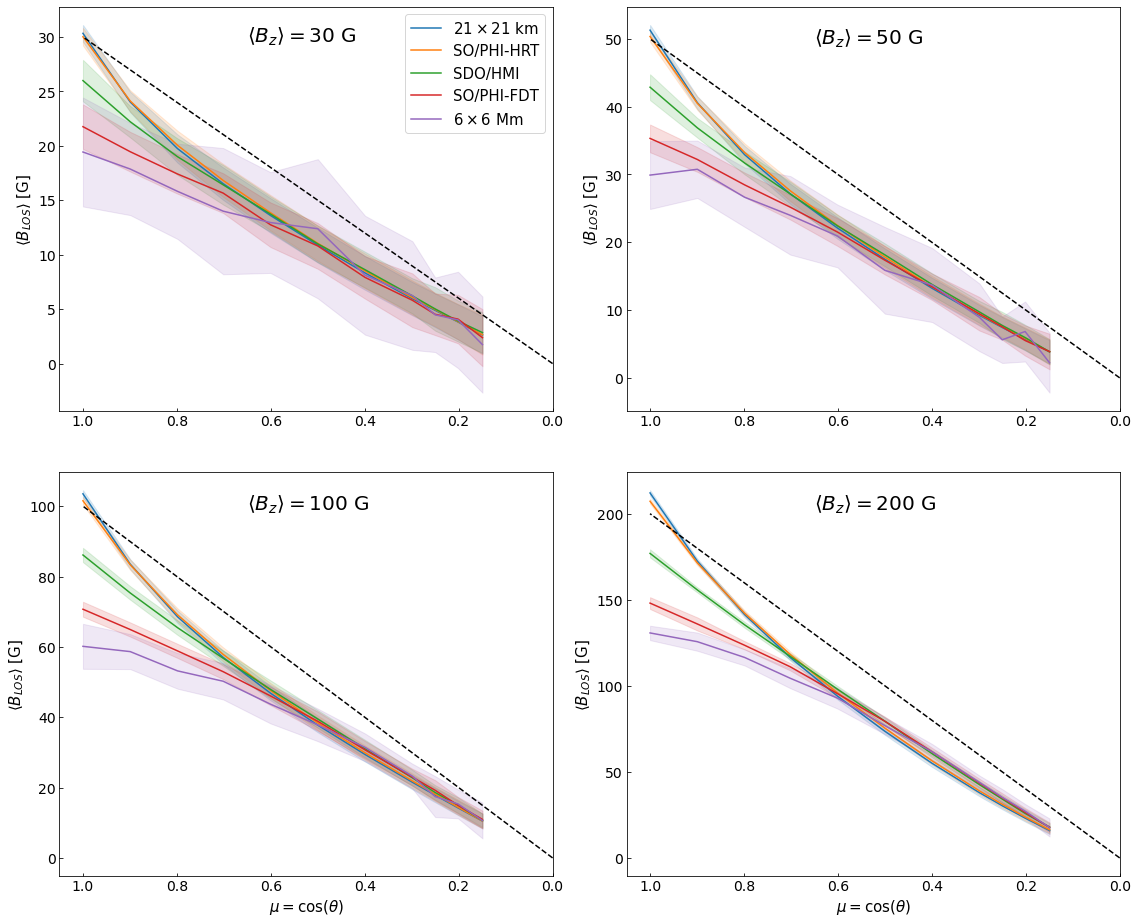

In [71]:
%matplotlib inline
#COG

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_COG_MURaM_30, plot_COG_fdt_30, plot_COG_hrt_30, plot_COG_hmi_30, plot_COG_one_30, \
                 field_strength = '30', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, plt_legend=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_COG_MURaM_50, plot_COG_fdt_50, plot_COG_hrt_50, plot_COG_hmi_50, plot_COG_one_50, field_strength = '50', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_COG_MURaM_100, plot_COG_fdt_100, plot_COG_hrt_100, plot_COG_hmi_100, plot_COG_one_100, field_strength = '100', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

# ax_120 = fig.add_subplot(gs[1, 1])
# plot_blos_curves(ax_120, plot_COG_MURaM_120, plot_COG_fdt_120, plot_COG_hrt_120, plot_COG_hmi_120, plot_COG_one_120, field_strength = '120', xlabel = True, ylabel = True)
# y = 0.9*ax_120.get_ylim()[1]
# ax_120.text(0.65,y,r"$\langle B_z \rangle = 120$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_COG_MURaM_200, plot_COG_fdt_200, plot_COG_hrt_200, plot_COG_hmi_200, plot_COG_one_200, field_strength = '200', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


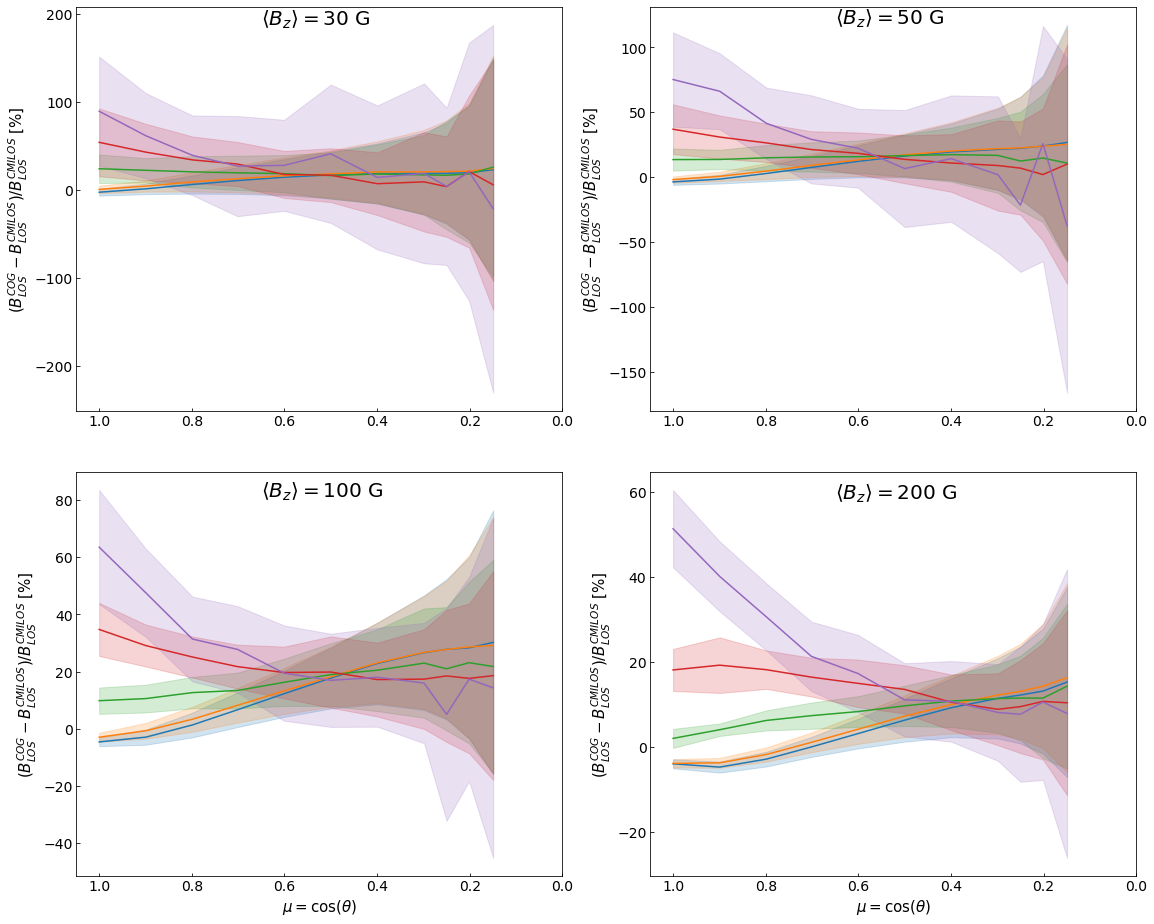

In [72]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], [plot_COG_MURaM_30, plot_COG_fdt_30, plot_COG_hrt_30, plot_COG_hmi_30, plot_COG_one_30], field_strength = '30', xlabel = None, ylabel = r"$(B_{LOS}^{COG}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50, [plot_MURaM_50, plot_fdt_50, plot_hrt_50, plot_hmi_50, plot_one_50], [plot_COG_MURaM_50, plot_COG_fdt_50, plot_COG_hrt_50, plot_COG_hmi_50, plot_COG_one_50], field_strength = '50', xlabel = None, ylabel = r"$(B_{LOS}^{COG}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100, [plot_MURaM_100, plot_fdt_100, plot_hrt_100, plot_hmi_100, plot_one_100], [plot_COG_MURaM_100, plot_COG_fdt_100, plot_COG_hrt_100, plot_COG_hmi_100, plot_COG_one_100], field_strength = '100', xlabel = True, ylabel = r"$(B_{LOS}^{COG}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], [plot_COG_MURaM_200, plot_COG_fdt_200, plot_COG_hrt_200, plot_COG_hmi_200, plot_COG_one_200], field_strength = '200', xlabel = True, ylabel = r"$(B_{LOS}^{COG}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


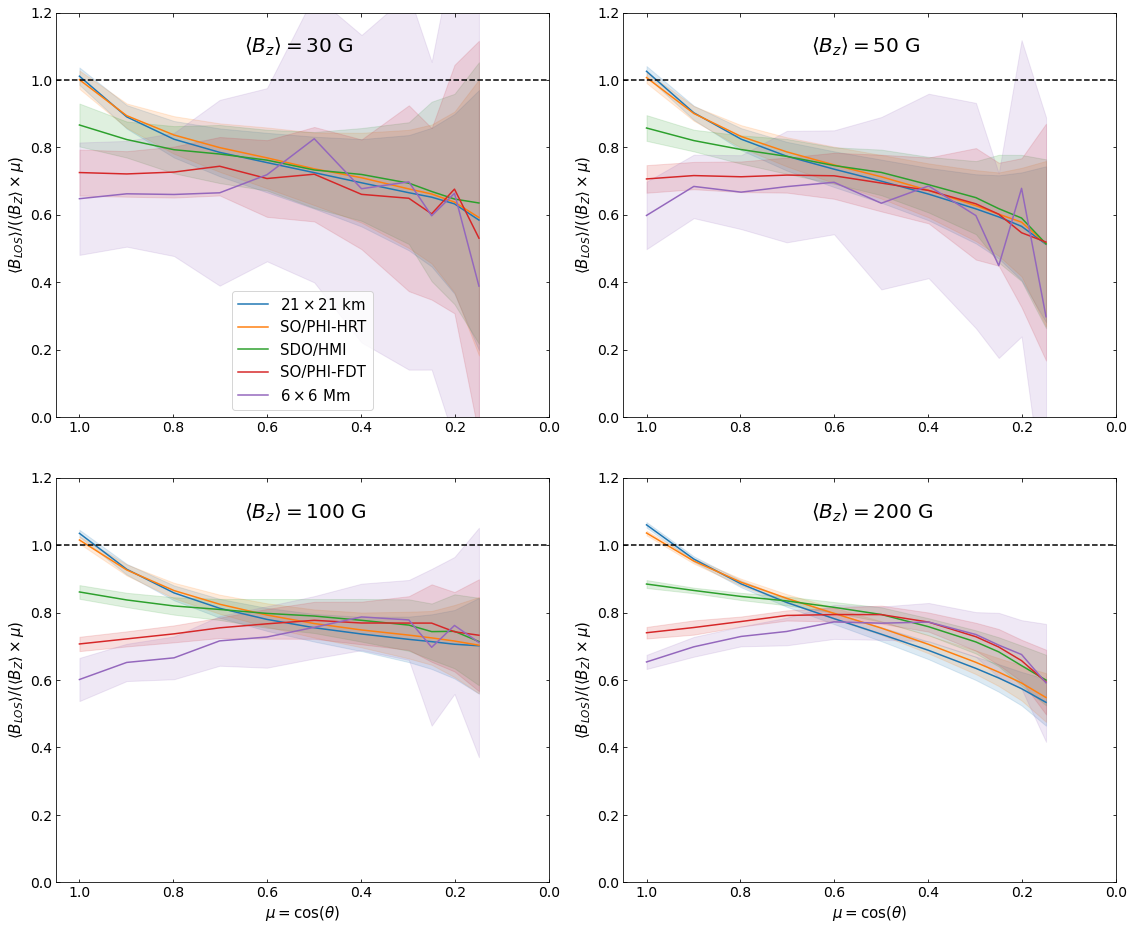

In [28]:
%matplotlib inline
#COG

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_COG_MURaM_30, plot_COG_fdt_30, plot_COG_hrt_30, plot_COG_hmi_30, plot_COG_one_30, \
                 field_strength = '30', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, plt_legend=True, div_by_exp=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_COG_MURaM_50, plot_COG_fdt_50, plot_COG_hrt_50, plot_COG_hmi_50, plot_COG_one_50, \
                 field_strength = '50', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, div_by_exp=True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_COG_MURaM_100, plot_COG_fdt_100, plot_COG_hrt_100, plot_COG_hmi_100, plot_COG_one_100, \
                 field_strength = '100', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True, div_by_exp=True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

# ax_120 = fig.add_subplot(gs[1, 1])
# plot_blos_curves(ax_120, plot_COG_MURaM_120, plot_COG_fdt_120, plot_COG_hrt_120, plot_COG_hmi_120, plot_COG_one_120, field_strength = '120', xlabel = True, ylabel = True)
# y = 0.9*ax_120.get_ylim()[1]
# ax_120.text(0.65,y,r"$\langle B_z \rangle = 120$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_COG_MURaM_200, plot_COG_fdt_200, plot_COG_hrt_200, plot_COG_hmi_200, plot_COG_one_200, \
                 field_strength = '200', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True, div_by_exp=True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.savefig('./plots/cog_clv_blos_frac_ticks.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


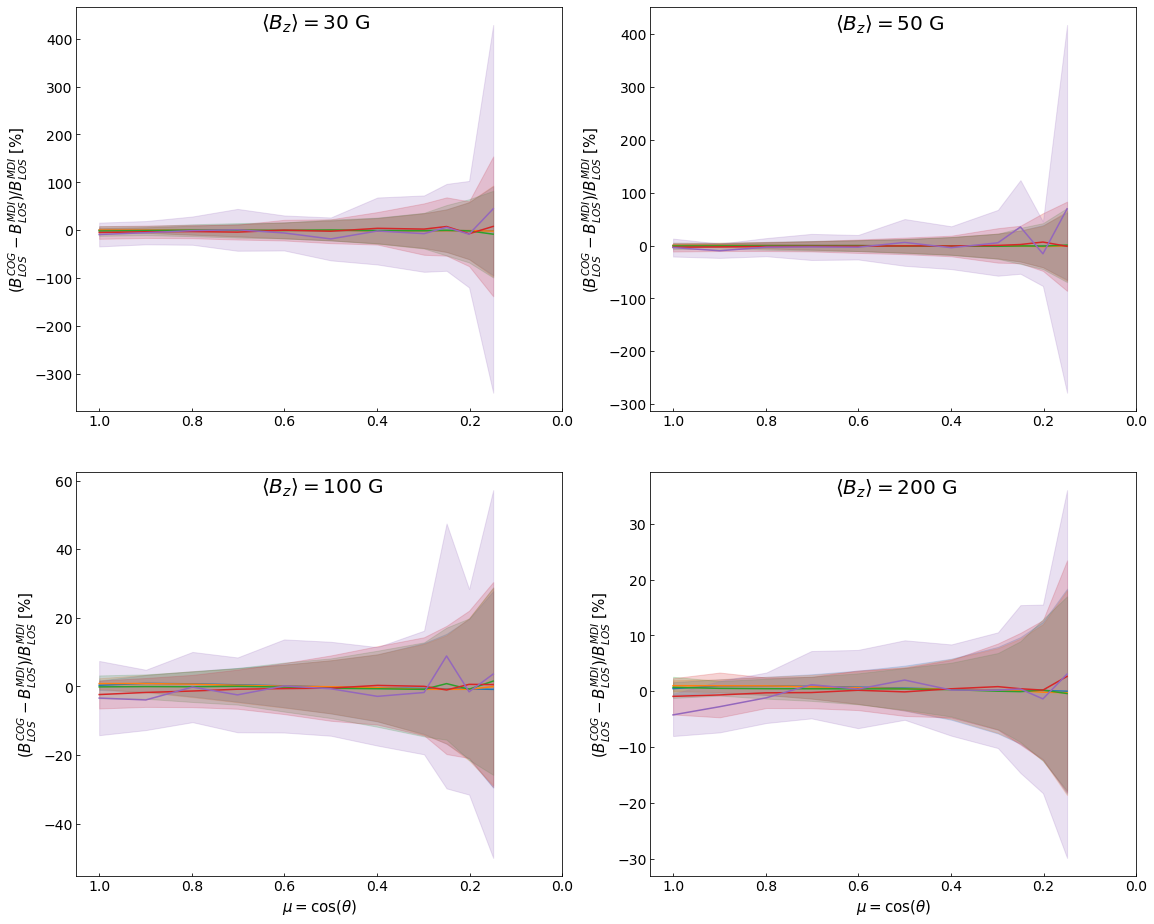

In [73]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30, [plot_COG_MURaM_30, plot_COG_fdt_30, plot_COG_hrt_30, plot_COG_hmi_30, plot_COG_one_30], [plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30], field_strength = '30', xlabel = None, ylabel = r"$(B_{LOS}^{COG}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50, [plot_COG_MURaM_50, plot_COG_fdt_50, plot_COG_hrt_50, plot_COG_hmi_50, plot_COG_one_50], [plot_MDI_MURaM_50, plot_MDI_fdt_50, plot_MDI_hrt_50, plot_MDI_hmi_50, plot_MDI_one_50], field_strength = '50', xlabel = None, ylabel = r"$(B_{LOS}^{COG}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100, [plot_COG_MURaM_100, plot_COG_fdt_100, plot_COG_hrt_100, plot_COG_hmi_100, plot_COG_one_100], [plot_MDI_MURaM_100, plot_MDI_fdt_100, plot_MDI_hrt_100, plot_MDI_hmi_100, plot_MDI_one_100], field_strength = '100', xlabel = True, ylabel = r"$(B_{LOS}^{COG}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_COG_MURaM_200, plot_COG_fdt_200, plot_COG_hrt_200, plot_COG_hmi_200, plot_COG_one_200], [plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200], field_strength = '200', xlabel = True, ylabel = r"$(B_{LOS}^{COG}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

# 6173 WFA

In [29]:
#load one pixel results
with open(r"./blos_pickles/wfa_200_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_120_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_100_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_50_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_30_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_30 = cPickle.load(output_file)

In [30]:
plot_WFA_one_200,plot_WFA_one_120,plot_WFA_one_100,plot_WFA_one_50,plot_WFA_one_30 = get_corr_avg_std_of_pos_neg(res_one_200,res_one_120,res_one_100,res_one_50,res_one_30,std_err = False)

In [31]:
#load hmi results
with open(r"./blos_pickles/wfa_200_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_120_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_100_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_50_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_30_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_30 = cPickle.load(output_file)
    
#res_hmi_200a,res_hmi_120a,res_hmi_100a,res_hmi_50a,res_hmi_30a = avg_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30)

In [32]:
plot_WFA_hmi_200,plot_WFA_hmi_120,plot_WFA_hmi_100,plot_WFA_hmi_50,plot_WFA_hmi_30 = get_corr_avg_std_of_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30,std_err = False)

In [33]:
#load fdt results
with open(r"./blos_pickles/wfa_200_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_120_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_100_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_50_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_30_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_30 = cPickle.load(output_file)
    
#res_fdt_200a,res_fdt_120a,res_fdt_100a,res_fdt_50a,res_fdt_30a = avg_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30)

In [34]:
plot_WFA_fdt_200,plot_WFA_fdt_120,plot_WFA_fdt_100,plot_WFA_fdt_50,plot_WFA_fdt_30 = get_corr_avg_std_of_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30,std_err = False)

In [35]:
#load hrt results
with open(r"./blos_pickles/wfa_200_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_120_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_100_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_50_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_30_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_30 = cPickle.load(output_file)
    
#res_hrt_200a,res_hrt_120a,res_hrt_100a,res_hrt_50a,res_hrt_30a = avg_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30)

In [36]:
plot_WFA_hrt_200,plot_WFA_hrt_120,plot_WFA_hrt_100,plot_WFA_hrt_50,plot_WFA_hrt_30 = get_corr_avg_std_of_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30,std_err = False)

In [37]:
#load MURaM results
with open(r"./blos_pickles/wfa_200_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_120_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_100_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_50_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_30_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_30 = cPickle.load(output_file)

In [38]:
plot_WFA_MURaM_200,plot_WFA_MURaM_120,plot_WFA_MURaM_100,plot_WFA_MURaM_50,plot_WFA_MURaM_30 = get_corr_avg_std_of_pos_neg(res_MURaM_200,res_MURaM_120,res_MURaM_100,res_MURaM_50,res_MURaM_30,std_err = False)

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


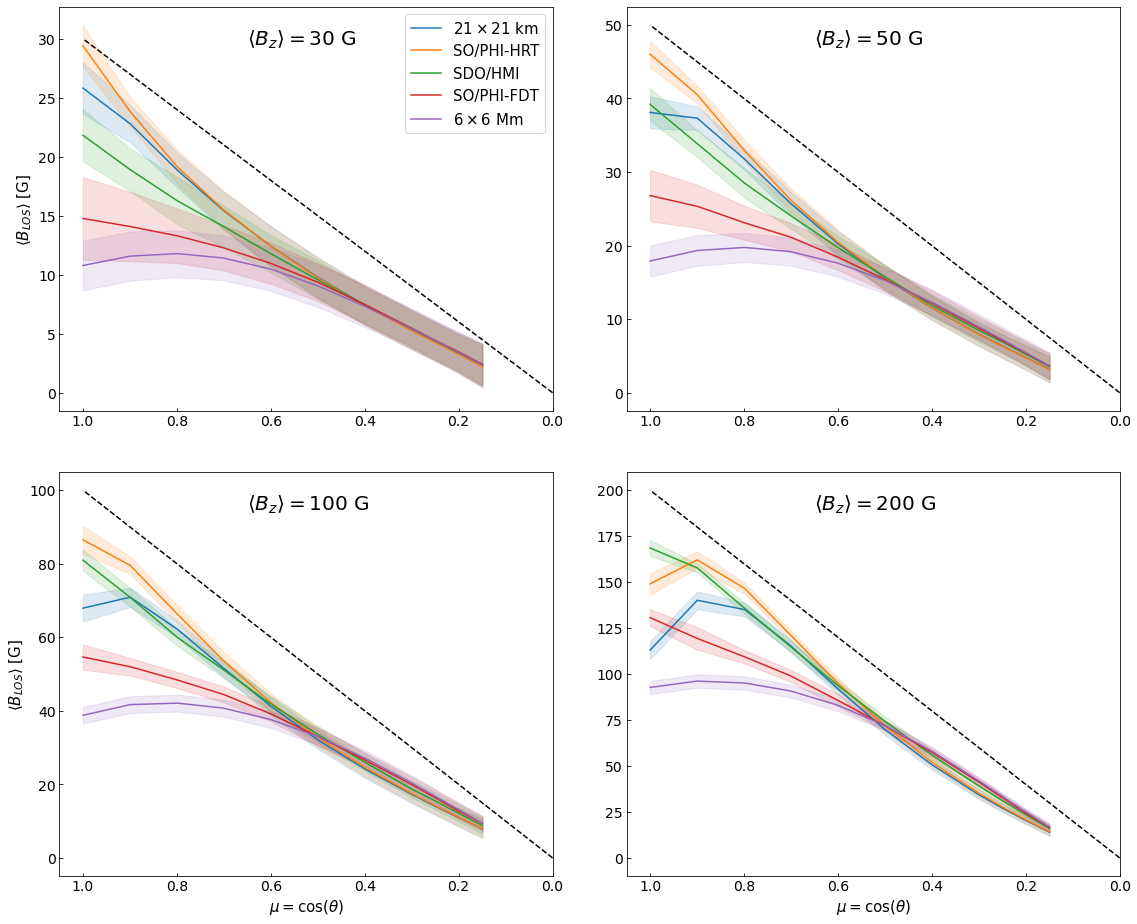

In [84]:
%matplotlib inline
#WFA

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_WFA_MURaM_30, plot_WFA_fdt_30, plot_WFA_hrt_30, plot_WFA_hmi_30, plot_WFA_one_30,\
                 field_strength = '30', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, plt_legend=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_WFA_MURaM_50, plot_WFA_fdt_50, plot_WFA_hrt_50, plot_WFA_hmi_50, plot_WFA_one_50, field_strength = '50', xlabel = None, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_WFA_MURaM_100, plot_WFA_fdt_100, plot_WFA_hrt_100, plot_WFA_hmi_100, plot_WFA_one_100, field_strength = '100', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

# ax_120 = fig.add_subplot(gs[1, 1])
# plot_blos_curves(ax_120, plot_WFA_MURaM_120, plot_WFA_fdt_120, plot_WFA_hrt_120, plot_WFA_hmi_120, plot_WFA_one_120, field_strength = '120', xlabel = True, ylabel = True)
# y = 0.9*ax_120.get_ylim()[1]
# ax_120.text(0.65,y,r"$\langle B_z \rangle = 120$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_WFA_MURaM_200, plot_WFA_fdt_200, plot_WFA_hrt_200, plot_WFA_hmi_200, plot_WFA_one_200, field_strength = '200', xlabel = True, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


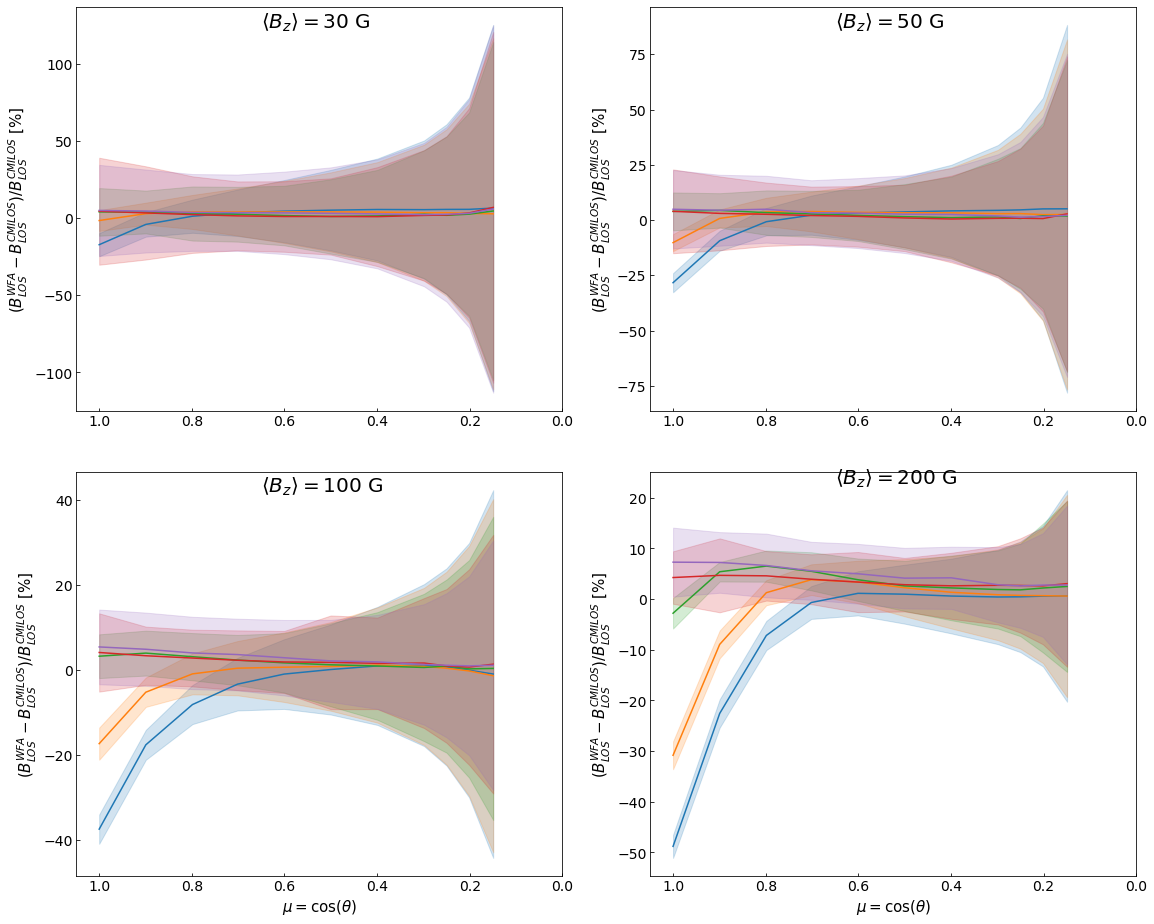

In [85]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], [plot_WFA_MURaM_30, plot_WFA_fdt_30, plot_WFA_hrt_30, plot_WFA_hmi_30, plot_WFA_one_30], field_strength = '30', xlabel = None, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50, [plot_MURaM_50, plot_fdt_50, plot_hrt_50, plot_hmi_50, plot_one_50], [plot_WFA_MURaM_50, plot_WFA_fdt_50, plot_WFA_hrt_50, plot_WFA_hmi_50, plot_WFA_one_50], field_strength = '50', xlabel = None, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100, [plot_MURaM_100, plot_fdt_100, plot_hrt_100, plot_hmi_100, plot_one_100], [plot_WFA_MURaM_100, plot_WFA_fdt_100, plot_WFA_hrt_100, plot_WFA_hmi_100, plot_WFA_one_100], field_strength = '100', xlabel = True, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], [plot_WFA_MURaM_200, plot_WFA_fdt_200, plot_WFA_hrt_200, plot_WFA_hmi_200, plot_WFA_one_200], field_strength = '200', xlabel = True, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


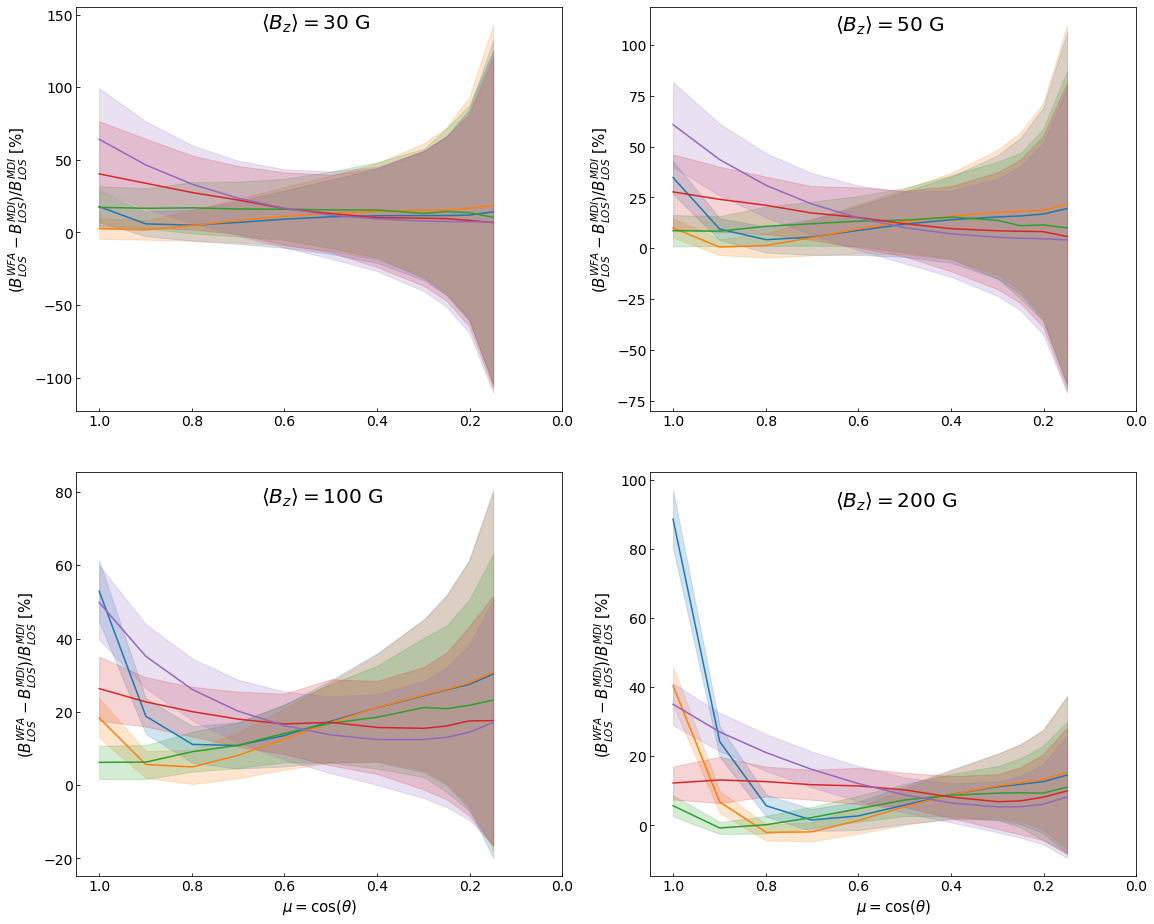

In [86]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30, [plot_WFA_MURaM_30, plot_WFA_fdt_30, plot_WFA_hrt_30, plot_WFA_hmi_30, plot_WFA_one_30], [plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30], field_strength = '30', xlabel = None, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50, [plot_WFA_MURaM_50, plot_WFA_fdt_50, plot_WFA_hrt_50, plot_WFA_hmi_50, plot_WFA_one_50], [plot_MDI_MURaM_50, plot_MDI_fdt_50, plot_MDI_hrt_50, plot_MDI_hmi_50, plot_MDI_one_50], field_strength = '50', xlabel = None, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100, [plot_WFA_MURaM_100, plot_WFA_fdt_100, plot_WFA_hrt_100, plot_WFA_hmi_100, plot_WFA_one_100], [plot_MDI_MURaM_100, plot_MDI_fdt_100, plot_MDI_hrt_100, plot_MDI_hmi_100, plot_MDI_one_100], field_strength = '100', xlabel = True, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_WFA_MURaM_200, plot_WFA_fdt_200, plot_WFA_hrt_200, plot_WFA_hmi_200, plot_WFA_one_200], [plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200], field_strength = '200', xlabel = True, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

# 6173 WFA-diff

In [39]:
#load one pixel results
with open(r"./blos_pickles/wfa_diff_200_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_120_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_100_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_50_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_30_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_30 = cPickle.load(output_file)

In [40]:
plot_WFA_diff_one_200,plot_WFA_diff_one_120,plot_WFA_diff_one_100,plot_WFA_diff_one_50,plot_WFA_diff_one_30 = get_corr_avg_std_of_pos_neg(res_one_200,res_one_120,res_one_100,res_one_50,res_one_30,std_err = False)

In [41]:
#load hmi results
with open(r"./blos_pickles/wfa_diff_200_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_120_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_100_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_50_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_30_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_30 = cPickle.load(output_file)
    
#res_hmi_200a,res_hmi_120a,res_hmi_100a,res_hmi_50a,res_hmi_30a = avg_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30)

In [42]:
plot_WFA_diff_hmi_200,plot_WFA_diff_hmi_120,plot_WFA_diff_hmi_100,plot_WFA_diff_hmi_50,plot_WFA_diff_hmi_30 = get_corr_avg_std_of_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30,std_err = False)

In [43]:
#load fdt results
with open(r"./blos_pickles/wfa_diff_200_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_120_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_100_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_50_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_30_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_30 = cPickle.load(output_file)
    
#res_fdt_200a,res_fdt_120a,res_fdt_100a,res_fdt_50a,res_fdt_30a = avg_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30)

In [44]:
plot_WFA_diff_fdt_200,plot_WFA_diff_fdt_120,plot_WFA_diff_fdt_100,plot_WFA_diff_fdt_50,plot_WFA_diff_fdt_30 = get_corr_avg_std_of_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30,std_err = False)

In [45]:
#load hrt results
with open(r"./blos_pickles/wfa_diff_200_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_120_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_100_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_50_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_30_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_30 = cPickle.load(output_file)
    
#res_hrt_200a,res_hrt_120a,res_hrt_100a,res_hrt_50a,res_hrt_30a = avg_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30)

In [46]:
plot_WFA_diff_hrt_200,plot_WFA_diff_hrt_120,plot_WFA_diff_hrt_100,plot_WFA_diff_hrt_50,plot_WFA_diff_hrt_30 = get_corr_avg_std_of_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30,std_err = False)

In [47]:
#load MURaM results
with open(r"./blos_pickles/wfa_diff_200_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_120_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_100_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_50_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_30_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_30 = cPickle.load(output_file)

In [48]:
plot_WFA_diff_MURaM_200,plot_WFA_diff_MURaM_120,plot_WFA_diff_MURaM_100,plot_WFA_diff_MURaM_50,plot_WFA_diff_MURaM_30 = get_corr_avg_std_of_pos_neg(res_MURaM_200,res_MURaM_120,res_MURaM_100,res_MURaM_50,res_MURaM_30,std_err = False)

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


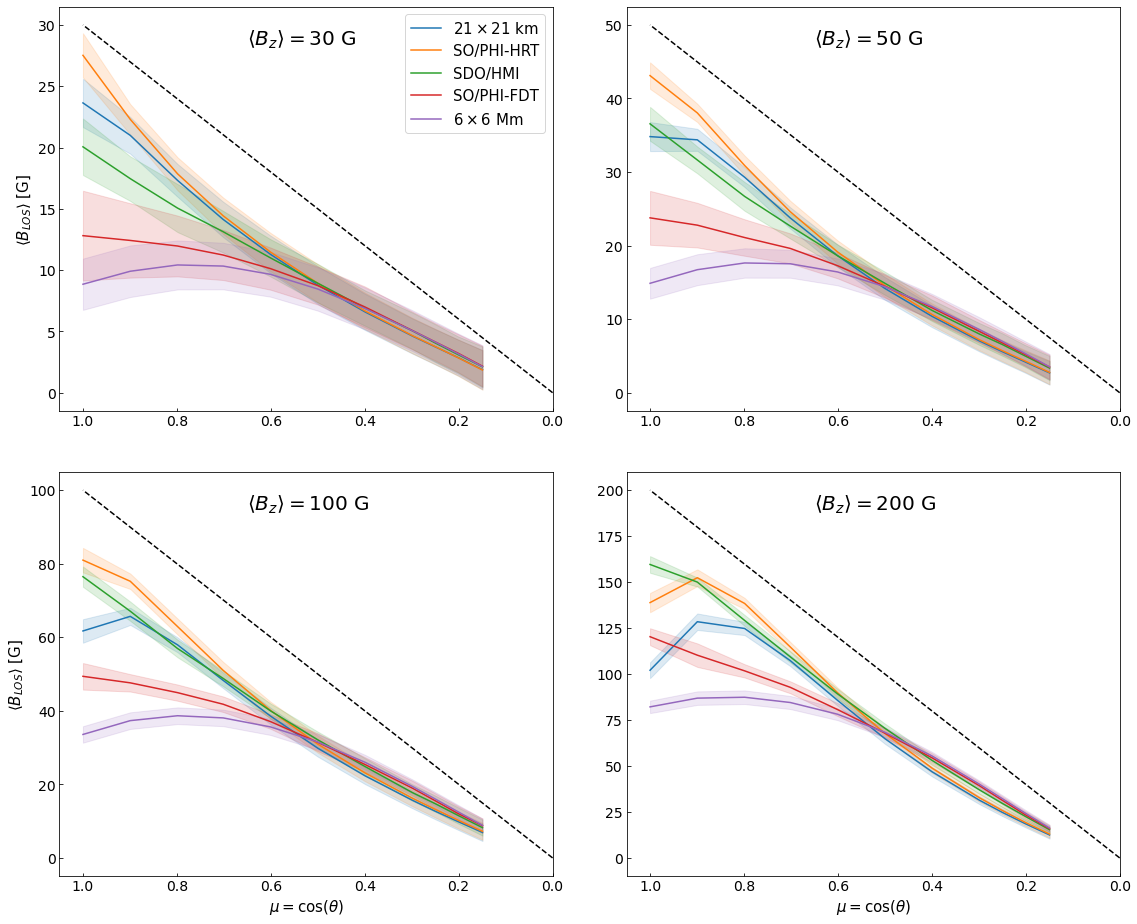

In [97]:
%matplotlib inline
#WFA

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_WFA_diff_MURaM_30, plot_WFA_diff_fdt_30, plot_WFA_diff_hrt_30, plot_WFA_diff_hmi_30, plot_WFA_diff_one_30,\
                 field_strength = '30', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, plt_legend=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_WFA_diff_MURaM_50, plot_WFA_diff_fdt_50, plot_WFA_diff_hrt_50, plot_WFA_diff_hmi_50, plot_WFA_diff_one_50, field_strength = '50', xlabel = None, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_WFA_diff_MURaM_100, plot_WFA_diff_fdt_100, plot_WFA_diff_hrt_100, plot_WFA_diff_hmi_100, plot_WFA_diff_one_100, field_strength = '100', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

# ax_120 = fig.add_subplot(gs[1, 1])
# plot_blos_curves(ax_120, plot_WFA_diff_MURaM_120, plot_WFA_diff_fdt_120, plot_WFA_diff_hrt_120, plot_WFA_diff_hmi_120, plot_WFA_diff_one_120, field_strength = '120', xlabel = True, ylabel = True)
# y = 0.9*ax_120.get_ylim()[1]
# ax_120.text(0.65,y,r"$\langle B_z \rangle = 120$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_WFA_diff_MURaM_200, plot_WFA_diff_fdt_200, plot_WFA_diff_hrt_200, plot_WFA_diff_hmi_200, plot_WFA_diff_one_200, field_strength = '200', xlabel = True, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.savefig('./plots/wfa_diff_clv_blos.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


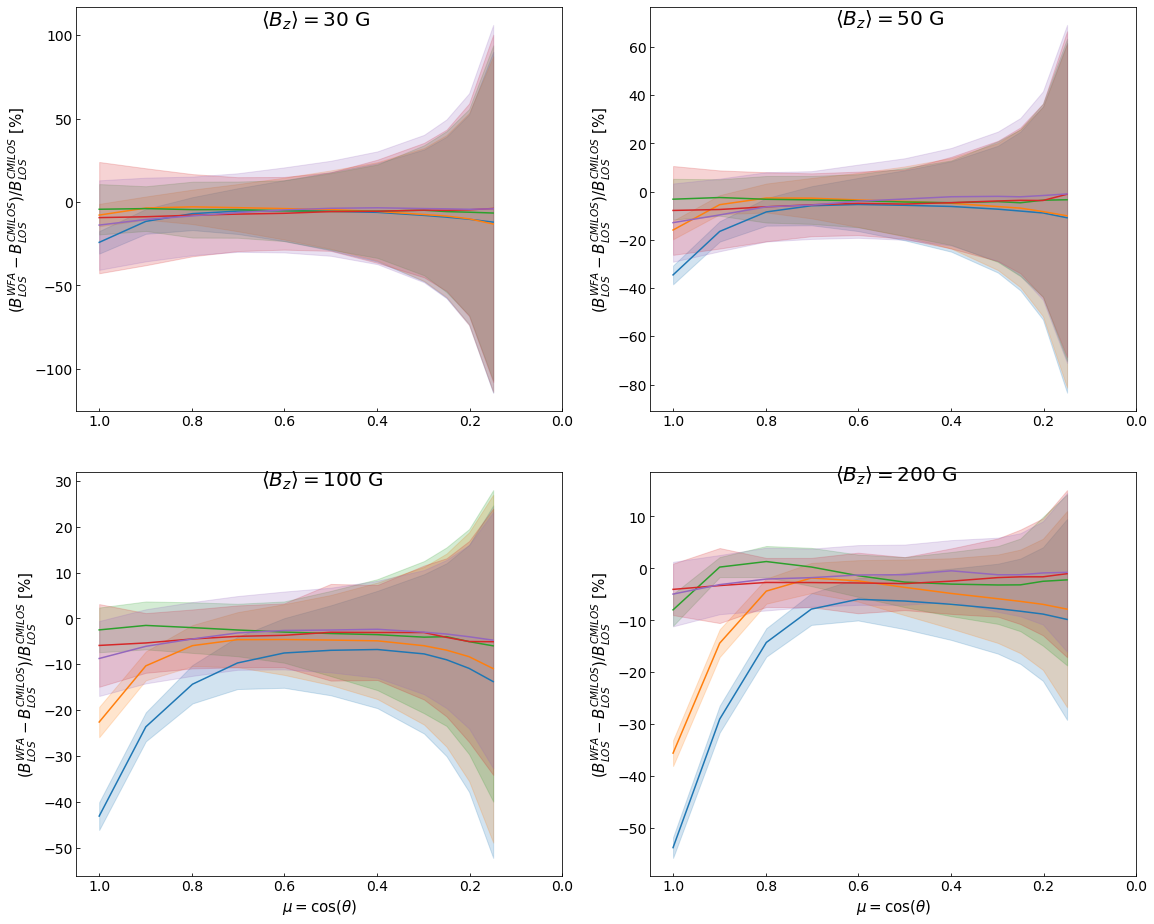

In [98]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], [plot_WFA_diff_MURaM_30, plot_WFA_diff_fdt_30, plot_WFA_diff_hrt_30, plot_WFA_diff_hmi_30, plot_WFA_diff_one_30], field_strength = '30', xlabel = None, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50, [plot_MURaM_50, plot_fdt_50, plot_hrt_50, plot_hmi_50, plot_one_50], [plot_WFA_diff_MURaM_50, plot_WFA_diff_fdt_50, plot_WFA_diff_hrt_50, plot_WFA_diff_hmi_50, plot_WFA_diff_one_50], field_strength = '50', xlabel = None, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100, [plot_MURaM_100, plot_fdt_100, plot_hrt_100, plot_hmi_100, plot_one_100], [plot_WFA_diff_MURaM_100, plot_WFA_diff_fdt_100, plot_WFA_diff_hrt_100, plot_WFA_diff_hmi_100, plot_WFA_diff_one_100], field_strength = '100', xlabel = True, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], [plot_WFA_diff_MURaM_200, plot_WFA_diff_fdt_200, plot_WFA_diff_hrt_200, plot_WFA_diff_hmi_200, plot_WFA_diff_one_200], field_strength = '200', xlabel = True, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


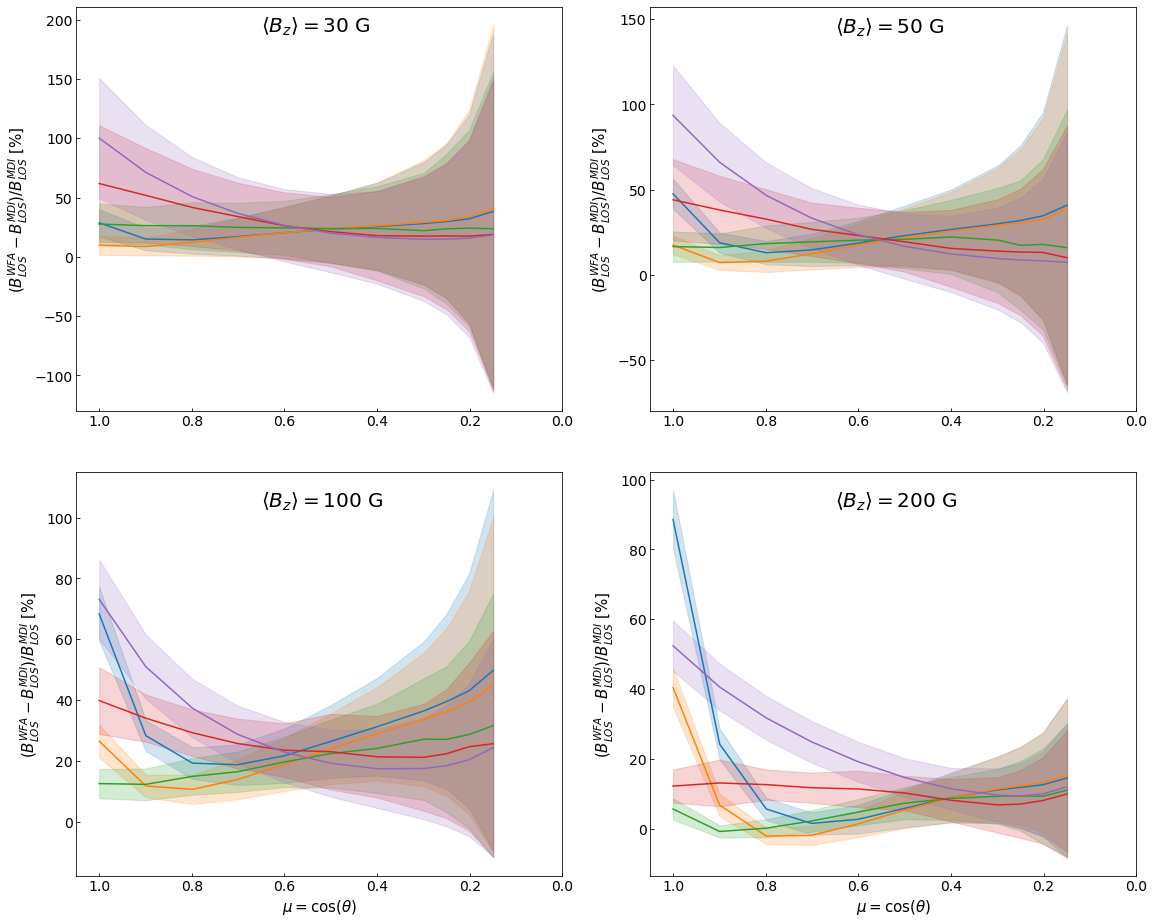

In [99]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30, [plot_WFA_diff_MURaM_30, plot_WFA_diff_fdt_30, plot_WFA_diff_hrt_30, plot_WFA_diff_hmi_30, plot_WFA_diff_one_30], [plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30], field_strength = '30', xlabel = None, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50, [plot_WFA_diff_MURaM_50, plot_WFA_diff_fdt_50, plot_WFA_diff_hrt_50, plot_WFA_diff_hmi_50, plot_WFA_diff_one_50], [plot_MDI_MURaM_50, plot_MDI_fdt_50, plot_MDI_hrt_50, plot_MDI_hmi_50, plot_MDI_one_50], field_strength = '50', xlabel = None, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100, [plot_WFA_diff_MURaM_100, plot_WFA_diff_fdt_100, plot_WFA_diff_hrt_100, plot_WFA_diff_hmi_100, plot_WFA_diff_one_100], [plot_MDI_MURaM_100, plot_MDI_fdt_100, plot_MDI_hrt_100, plot_MDI_hmi_100, plot_MDI_one_100], field_strength = '100', xlabel = True, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_WFA_MURaM_200, plot_WFA_fdt_200, plot_WFA_hrt_200, plot_WFA_hmi_200, plot_WFA_diff_one_200], [plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200], field_strength = '200', xlabel = True, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


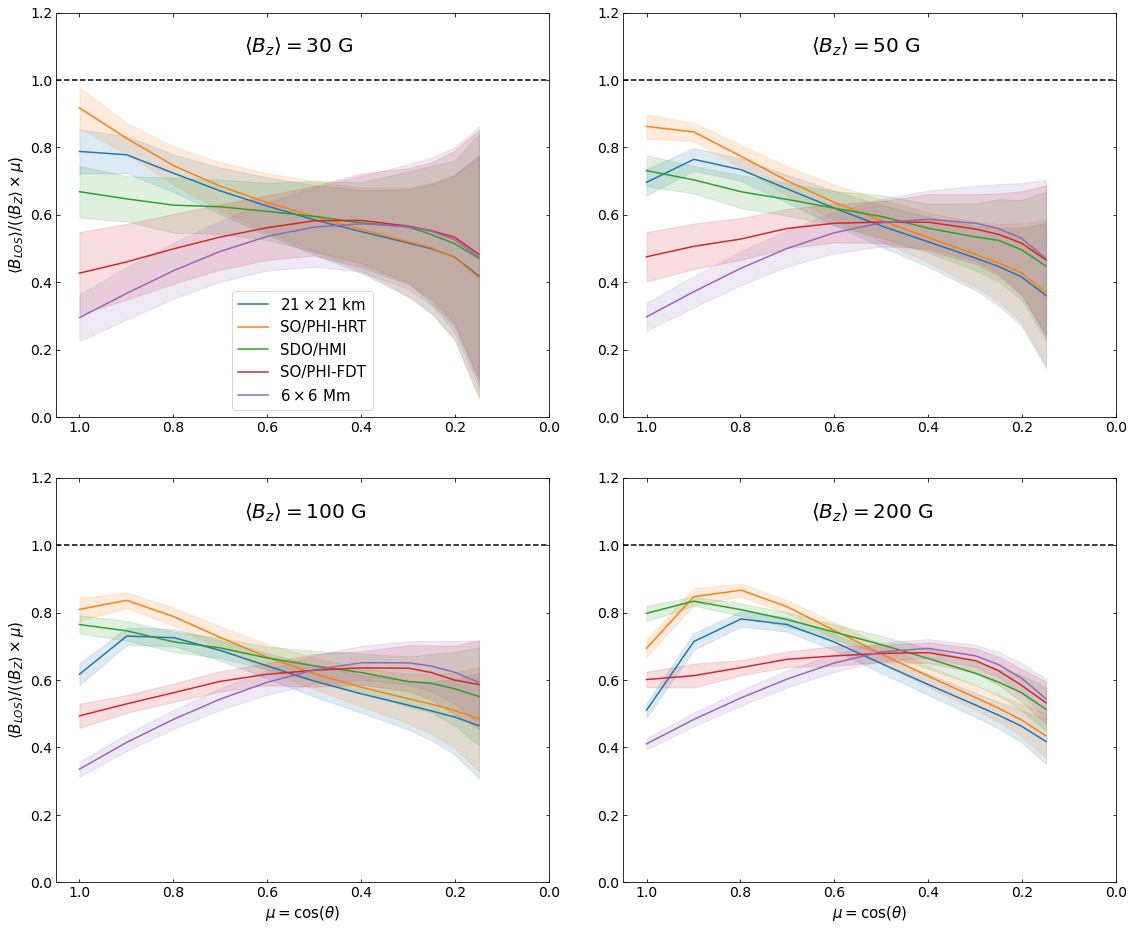

In [50]:
%matplotlib inline
#WFA

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_WFA_diff_MURaM_30, plot_WFA_diff_fdt_30, plot_WFA_diff_hrt_30, plot_WFA_diff_hmi_30, plot_WFA_diff_one_30,\
                 field_strength = '30', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, plt_legend=True, div_by_exp=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_WFA_diff_MURaM_50, plot_WFA_diff_fdt_50, plot_WFA_diff_hrt_50, plot_WFA_diff_hmi_50, plot_WFA_diff_one_50, \
                 field_strength = '50', xlabel = None, ylabel = None, mu_lim=11, shaded_err = True, div_by_exp=True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_WFA_diff_MURaM_100, plot_WFA_diff_fdt_100, plot_WFA_diff_hrt_100, plot_WFA_diff_hmi_100, plot_WFA_diff_one_100, \
                 field_strength = '100', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True, div_by_exp=True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

# ax_120 = fig.add_subplot(gs[1, 1])
# plot_blos_curves(ax_120, plot_WFA_diff_MURaM_120, plot_WFA_diff_fdt_120, plot_WFA_diff_hrt_120, plot_WFA_diff_hmi_120, plot_WFA_diff_one_120, field_strength = '120', xlabel = True, ylabel = True)
# y = 0.9*ax_120.get_ylim()[1]
# ax_120.text(0.65,y,r"$\langle B_z \rangle = 120$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_WFA_diff_MURaM_200, plot_WFA_diff_fdt_200, plot_WFA_diff_hrt_200, plot_WFA_diff_hmi_200, plot_WFA_diff_one_200, \
                 field_strength = '200', xlabel = True, ylabel = None, mu_lim=11, shaded_err = True, div_by_exp=True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.savefig('./plots/wfa_diff_clv_blos_frac_ticks.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()